In [1]:
3
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stat
import pylab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
# Reading the data and storing it in a dataframe

dataset=pd.read_csv('train.csv')

# Printing the shape of dataset with rows and columns

print(dataset.shape)

(1460, 81)


In [3]:
# Printing the top5 records

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Understanding Missing Values

# Checking the percentage of nan values present in each feature

# Describing the dataset of features which has missing values

features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
# Printing the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.5973  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


In [5]:
# Checking the number of categorical and numerical null variables

df = dataset.copy()
numerical_features_with_na =[]
categorical_features_with_na =[]
for feature in features_with_na:
    if pd.api.types.is_numeric_dtype(df[feature]):
        numerical_features_with_na.append(feature)
    else:
        categorical_features_with_na.append(feature)
print("The categrical null count is ",len(categorical_features_with_na))
print("The numerical null count is ",len(numerical_features_with_na))
print(numerical_features_with_na)

# Printing the count of the unique value of the feature 

for feature in numerical_features_with_na:
    unique_values, counts = np.unique(df[feature].to_numpy(), return_counts=True)
    print(feature,unique_values, counts)

The categrical null count is  15
The numerical null count is  3
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
LotFrontage [ 21.  24.  30.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 114. 115. 116. 118. 120. 121. 122. 124. 128. 129. 130. 134. 137. 138.
 140. 141. 144. 149. 150. 152. 153. 160. 168. 174. 182. 313.  nan] [ 23  19   6   5   1  10   9   6   5   1   1  12   6   4  12   9   3   1
   5   6   4  57  15  14  10   6  17   5  12   7  13 143   8   9  17  19
  44  15  12  19  11  70  12  17  18  15  53  11   9  25  17  69   6  12
   5   9  40  10   5  10   6  23   6  10   8   6   7   8   2   8   3  16
   2   4   3   3   6   

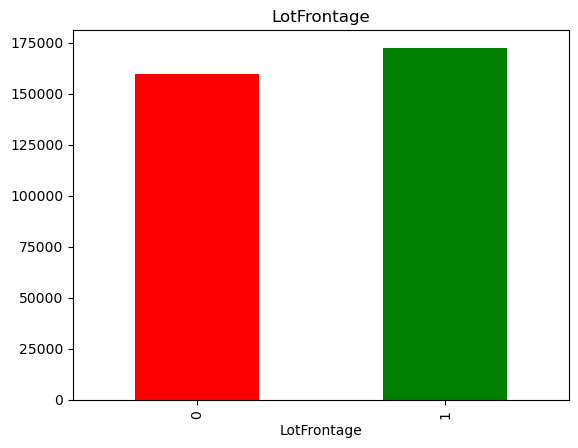

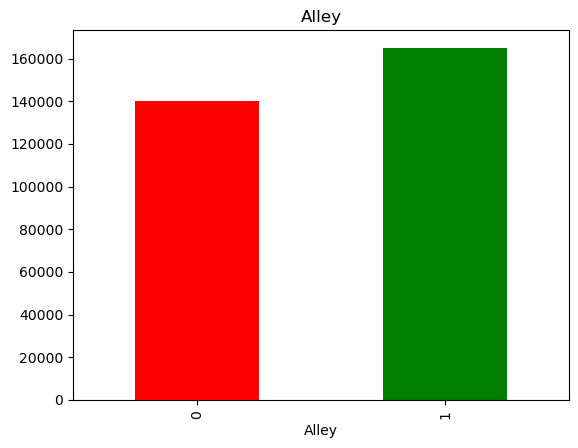

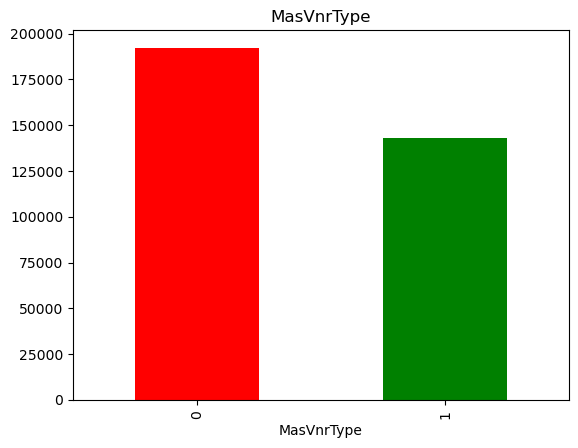

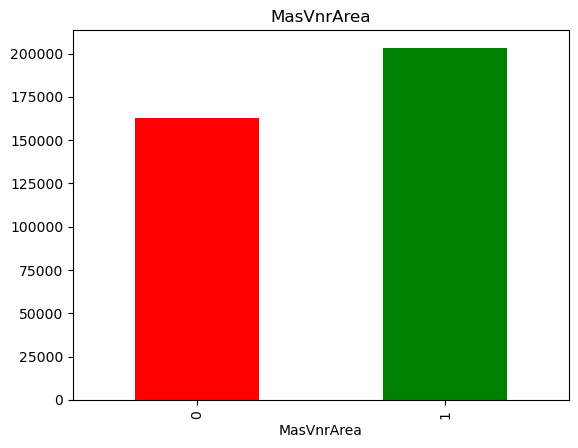

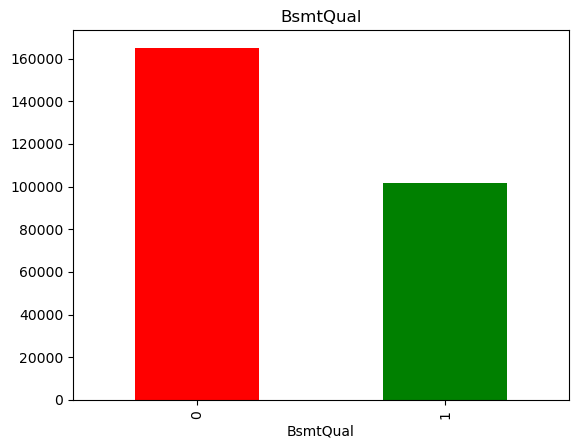

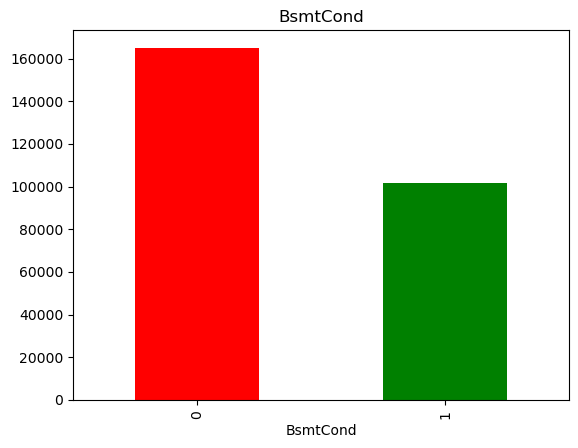

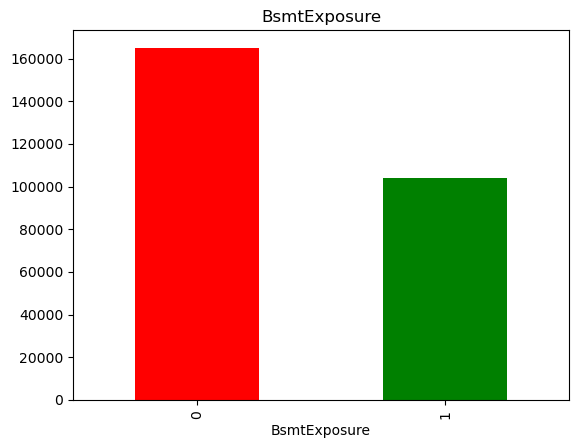

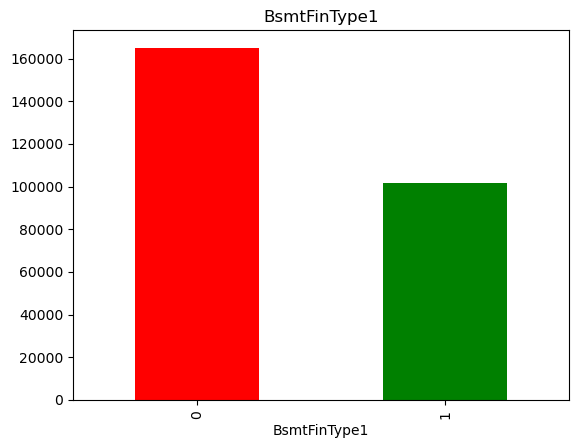

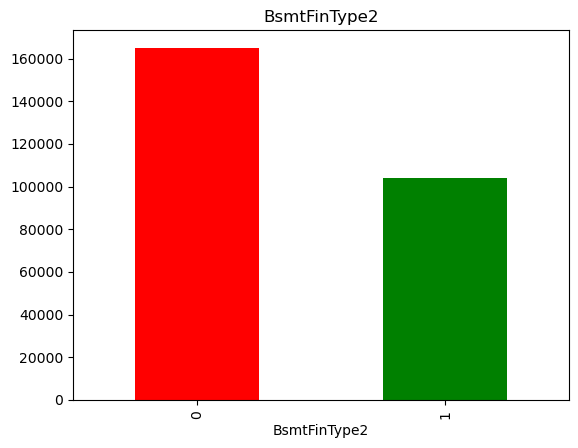

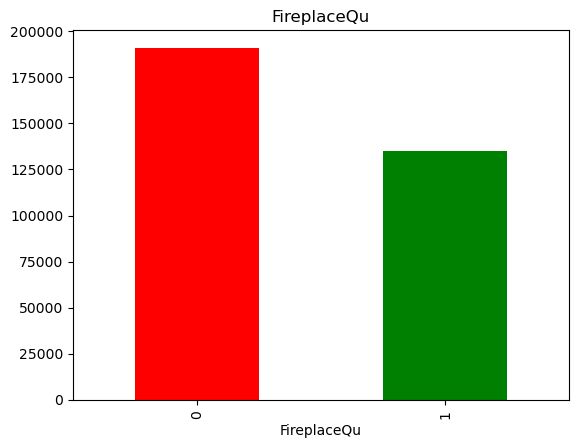

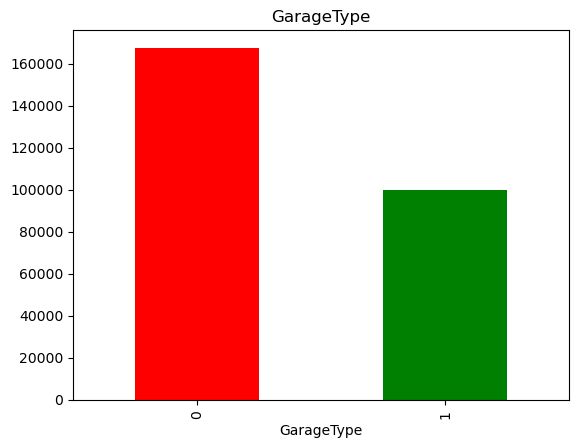

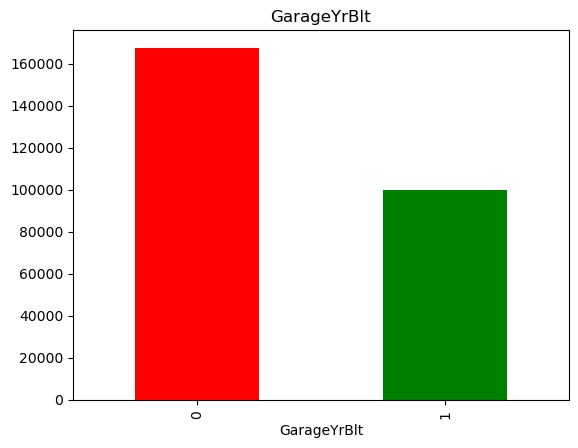

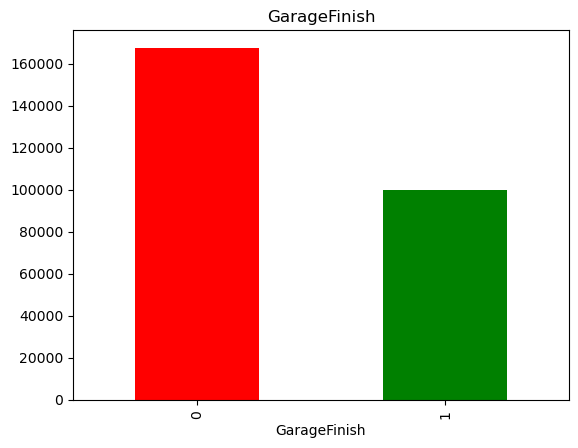

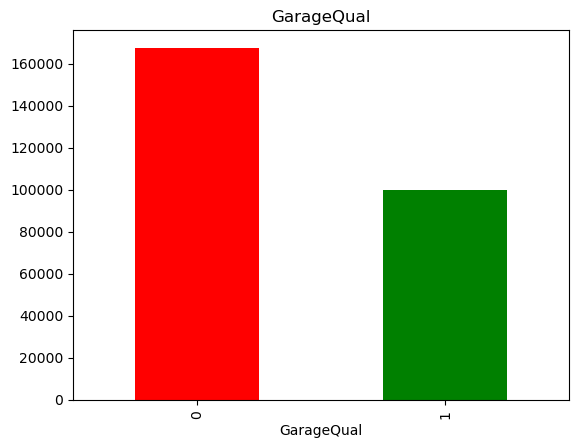

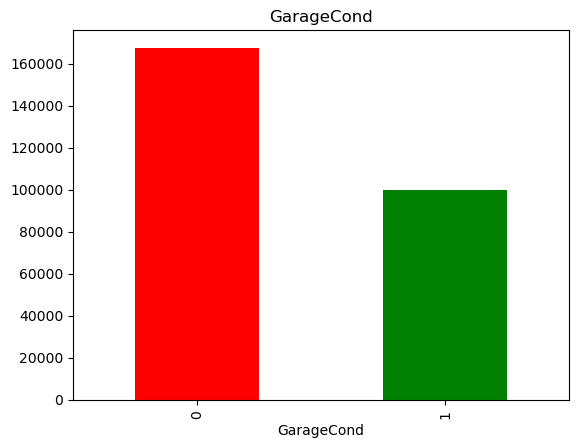

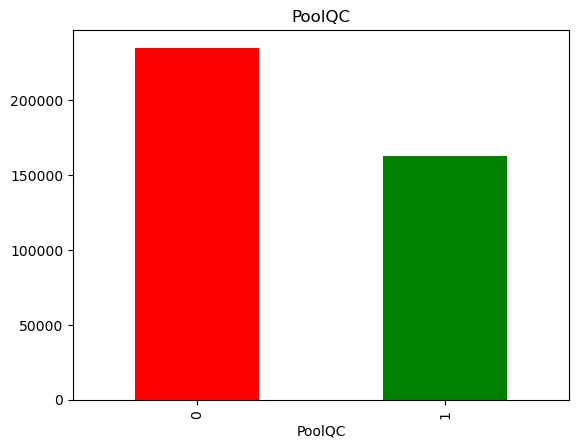

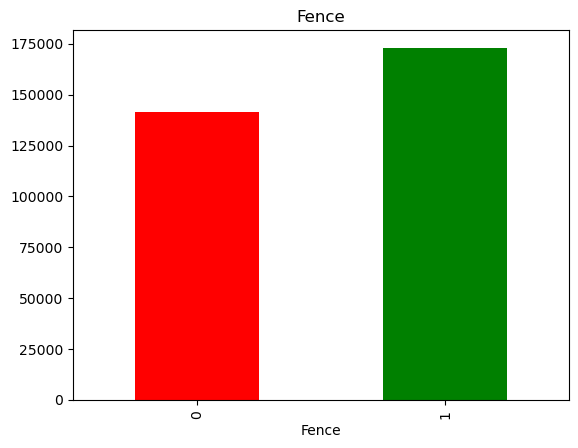

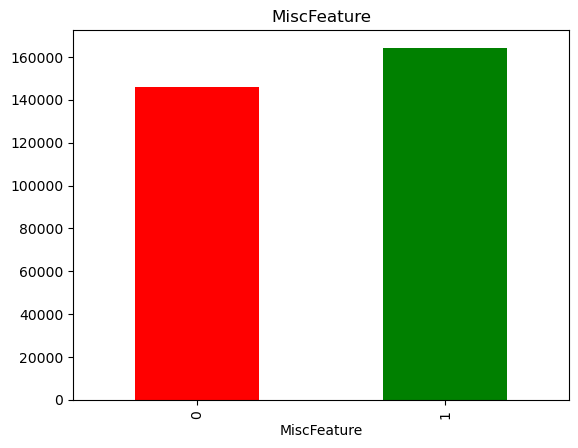

In [6]:
# Relationship between the null values and Dependent variable 'SalesPrice'

for feature in features_with_na:
    data = dataset.copy()
    
    # Creating a variable that indicates 1 if the observation was missing or zero otherwise
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # Calculate the centre of tendency of SalePrice where the information is missing or present
    
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['r','g'])
    plt.title(feature)
    plt.show()

In [7]:
# Listing of variables with numerical values

numerical_features = []
for feature in dataset.columns:
    if dataset[feature].dtypes != 'O':
        numerical_features.append(feature)

print('Number of numerical variables: ', len(numerical_features))

# Visualise the numerical variables

dataset[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [8]:
# Listing variables that contain year information

year_feature = []
for feature in numerical_features:
    if 'Yr' in feature or 'Year' in feature:
        year_feature.append(feature)

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
# Exploring the content of these year variables

for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

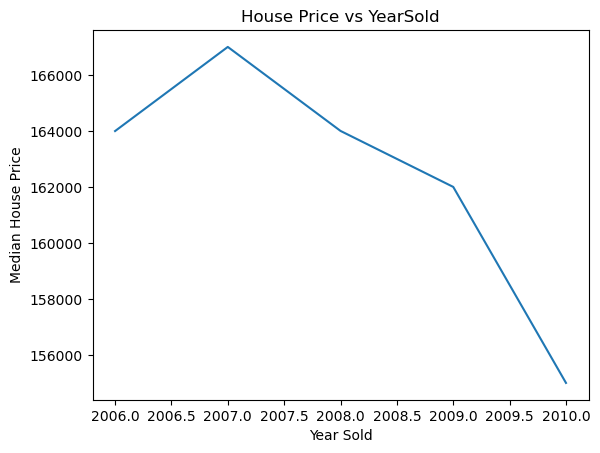

In [10]:
## Checking a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

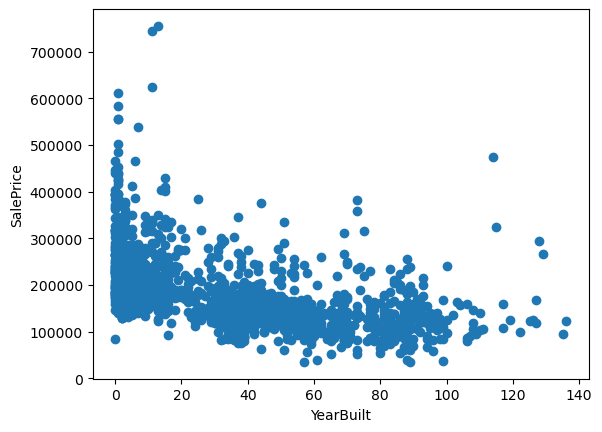

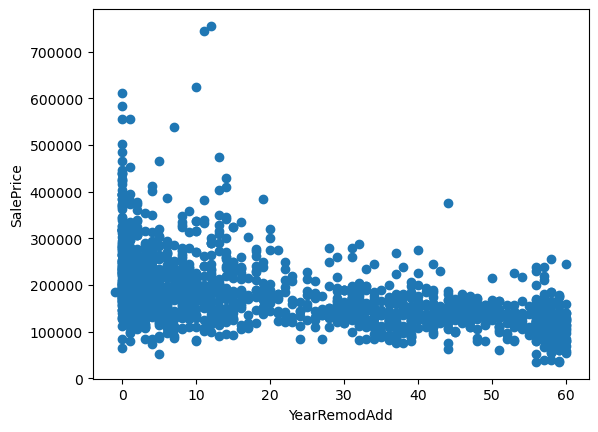

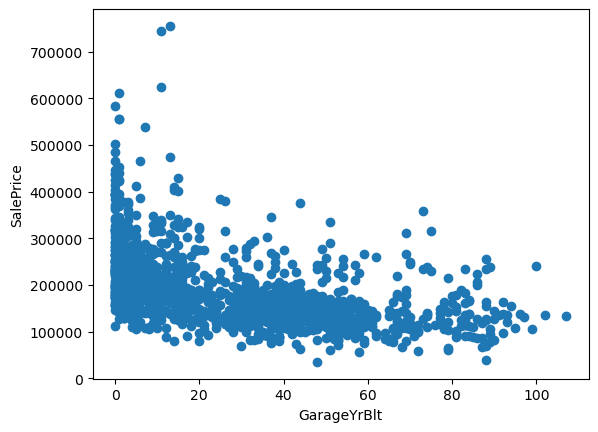

In [11]:
# Calculating the difference between yearsold and all other remainig date variables

for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        
        # Capturing the difference between year variable and year the house was sold for
        
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [12]:
# Finding the unique values in feature with numerical value

for feature in numerical_features:
    print(feature, dataset[feature].nunique())

Id 1460
MSSubClass 15
LotFrontage 110
LotArea 1073
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
MasVnrArea 327
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageYrBlt 97
GarageCars 5
GarageArea 441
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 21
MoSold 12
YrSold 5
SalePrice 663


In [13]:
# Breaking down variables with numerical values as discrete and categorical

# Finding the discrete variables

discrete_feature=[]
for feature in numerical_features:
    if (dataset[feature].nunique())<25:
        discrete_feature.append(feature)
        
# Checking the unique values and their counts

for feature in discrete_feature:
    unique_values, counts = np.unique(dataset[feature].to_numpy(), return_counts=True)
    print(feature,unique_values, counts)

# Printing the total count of the discrete features

print("\n")
print("Discrete Variables Count: {}".format(len(discrete_feature)))
dataset[discrete_feature].head()

MSSubClass [ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190] [536  69   4  12 144 299  60  16  58  20  52  87  63  10  30]
OverallQual [ 1  2  3  4  5  6  7  8  9 10] [  2   3  20 116 397 374 319 168  43  18]
OverallCond [1 2 3 4 5 6 7 8 9] [  1   5  25  57 821 252 205  72  22]
LowQualFinSF [  0  53  80 120 144 156 205 232 234 360 371 384 390 392 397 420 473 479
 481 513 514 515 528 572] [1434    1    3    1    1    1    1    1    1    2    1    1    1    1
    1    1    1    1    1    1    1    1    1    1]
BsmtFullBath [0 1 2 3] [856 588  15   1]
BsmtHalfBath [0 1 2] [1378   80    2]
FullBath [0 1 2 3] [  9 650 768  33]
HalfBath [0 1 2] [913 535  12]
BedroomAbvGr [0 1 2 3 4 5 6 8] [  6  50 358 804 213  21   7   1]
KitchenAbvGr [0 1 2 3] [   1 1392   65    2]
TotRmsAbvGrd [ 2  3  4  5  6  7  8  9 10 11 12 14] [  1  17  97 275 402 329 187  75  47  18  11   1]
Fireplaces [0 1 2 3] [690 650 115   5]
GarageCars [0 1 2 3 4] [ 81 369 824 181   5]
3SsnPorch [  0  23  96 130 140 1

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


In [15]:
# Based on the count of the unique values we know that the LowQualFinSF, 3SsnPorch, PoolArea, MiscVal,

feature_to_be_removed = ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']
for feature in discrete_feature:
    if feature in feature_to_be_removed:
        discrete_feature.remove(feature)
print(discrete_feature)
print(len(discrete_feature))

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
14


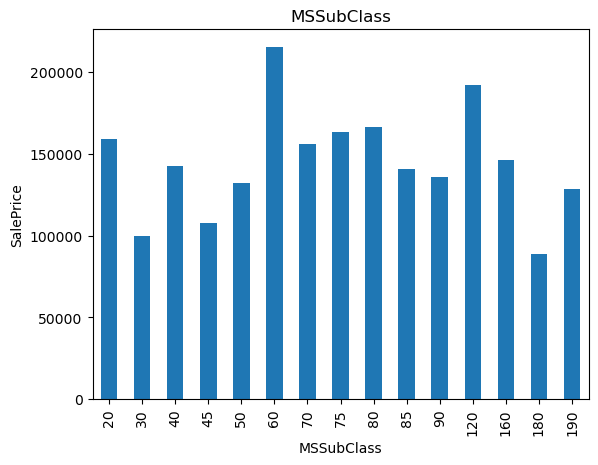

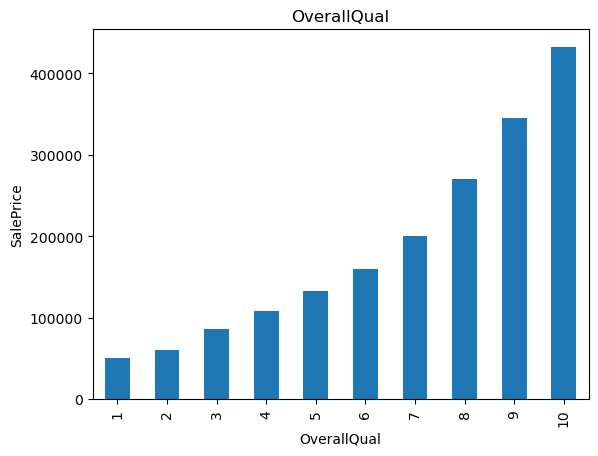

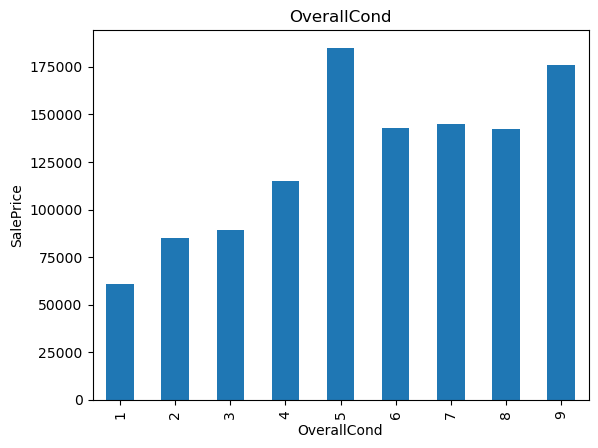

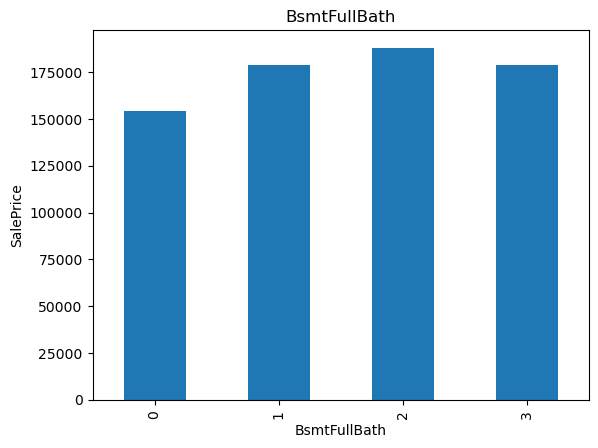

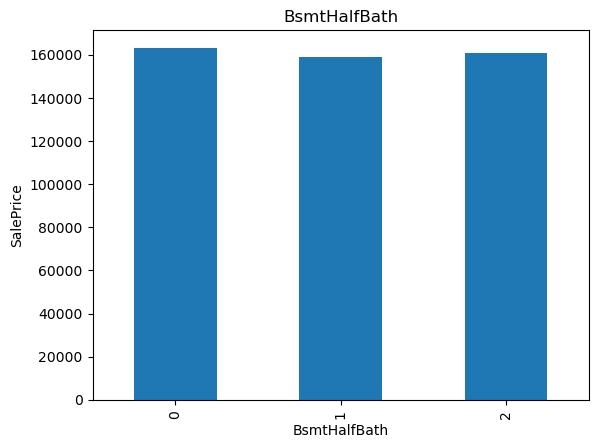

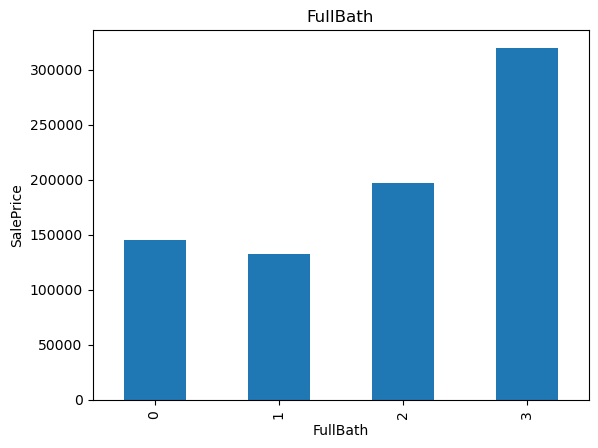

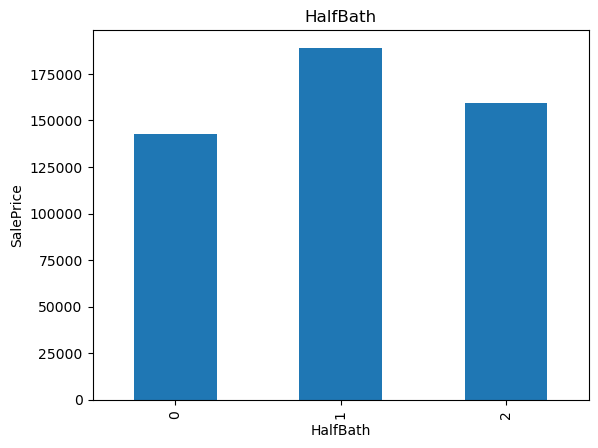

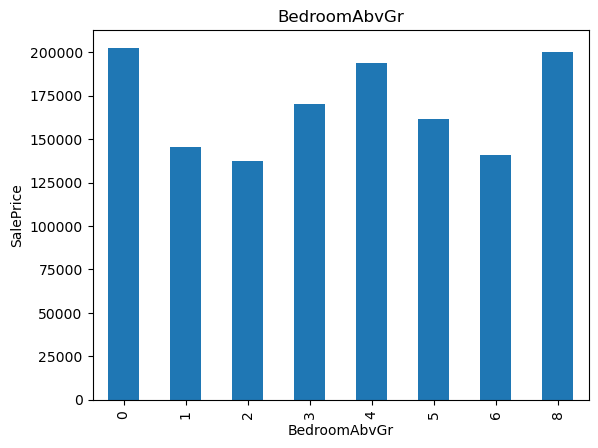

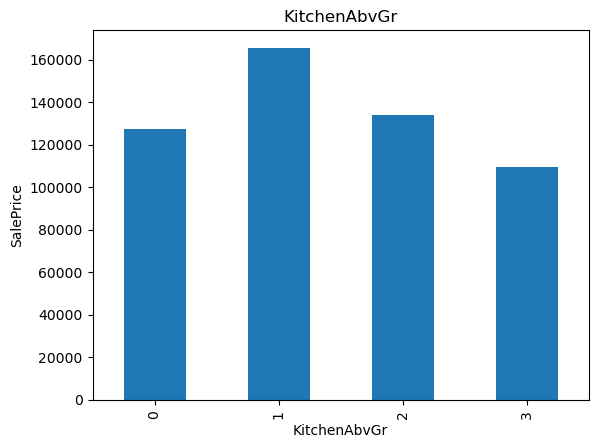

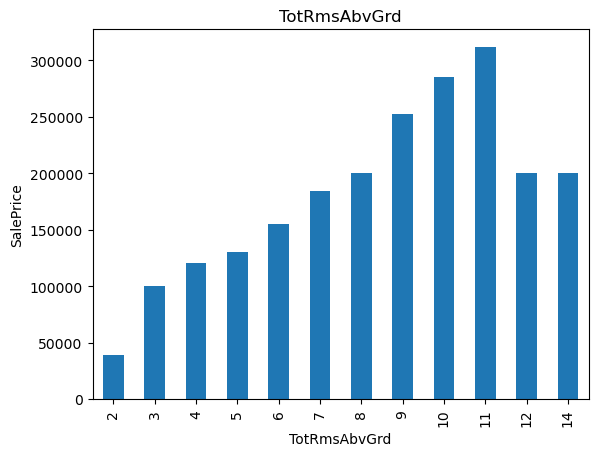

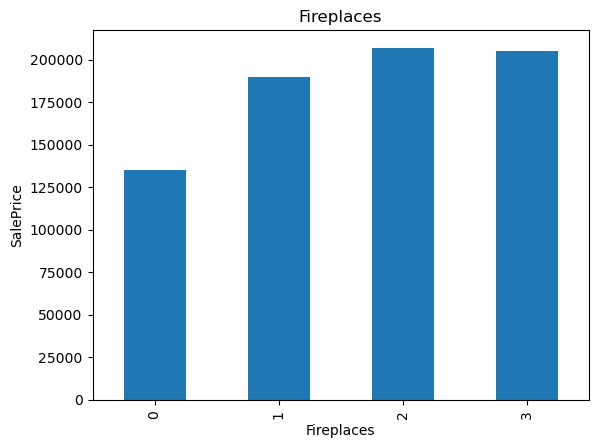

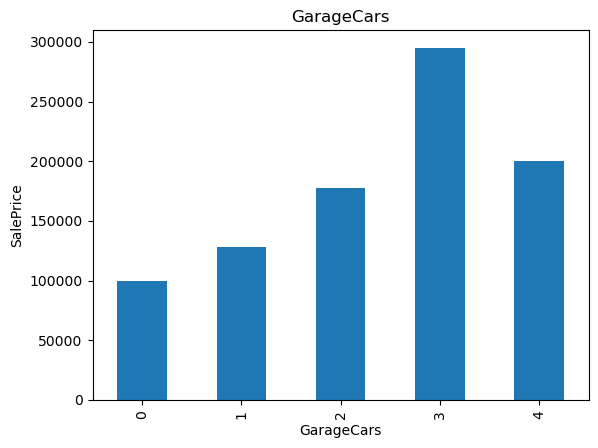

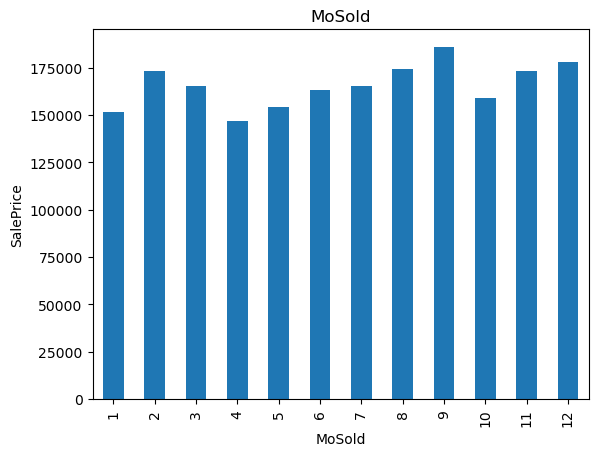

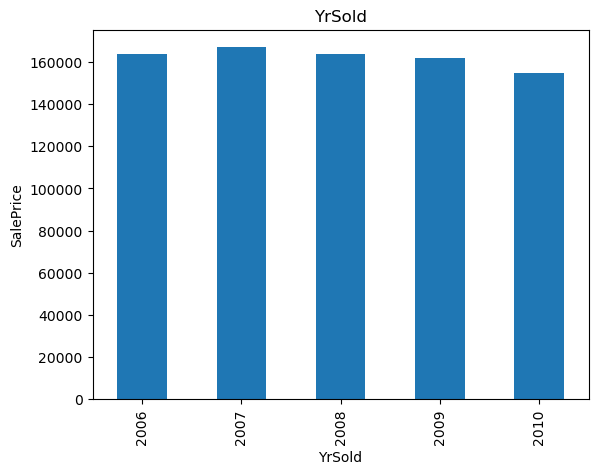

In [16]:
# Finidng the realtionship between discrete features and Sale PRice

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [17]:
# Finding the Continous Feature (Basically they are not date variables(features dealing with years, 
# discrete variable and ID coulum from the list of all numerical variable))

continuous_feature=[]
for feature in numerical_features:
    if feature not in discrete_feature+year_feature+['Id']:
        continuous_feature.append(feature)
print("Continuous feature Count {}".format(len(continuous_feature)))
dataset[continuous_feature].head()

Continuous feature Count 20


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


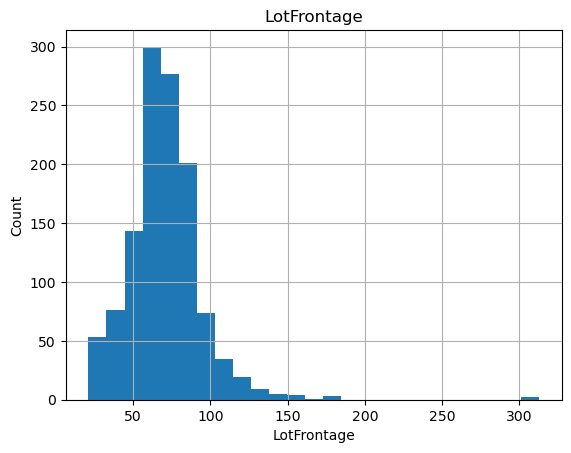

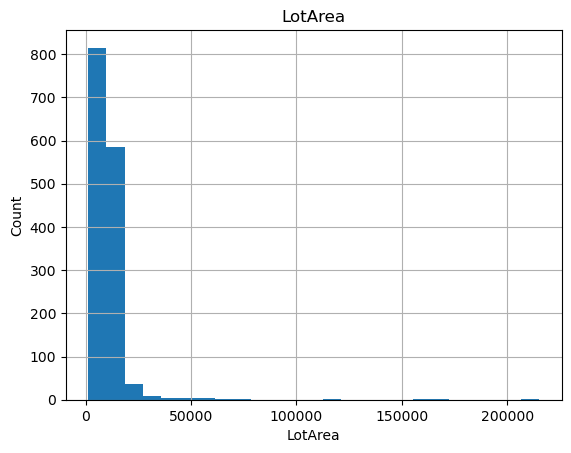

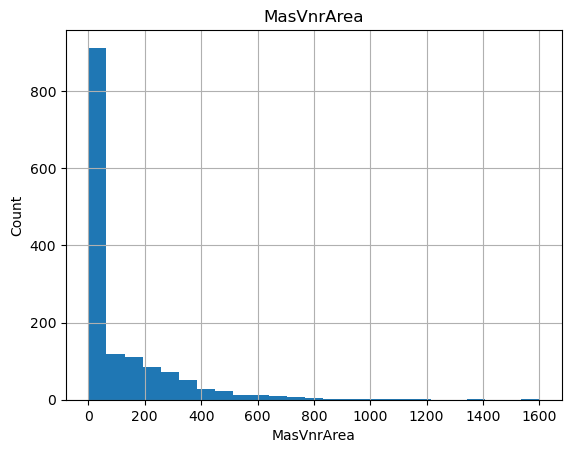

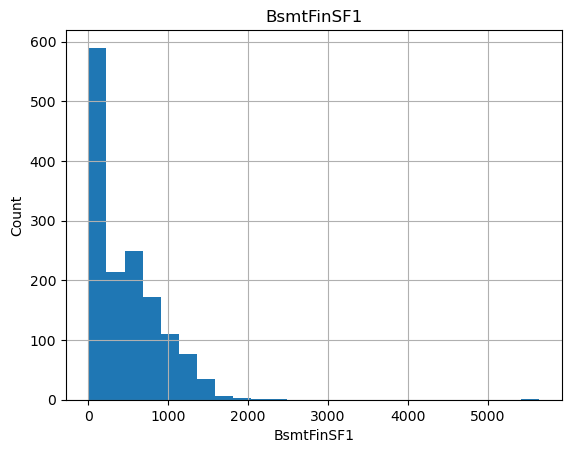

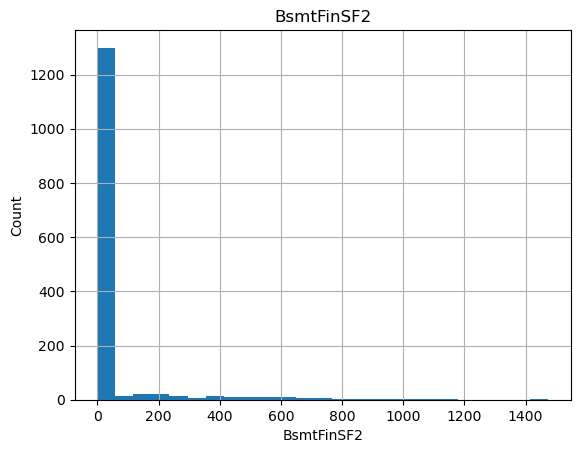

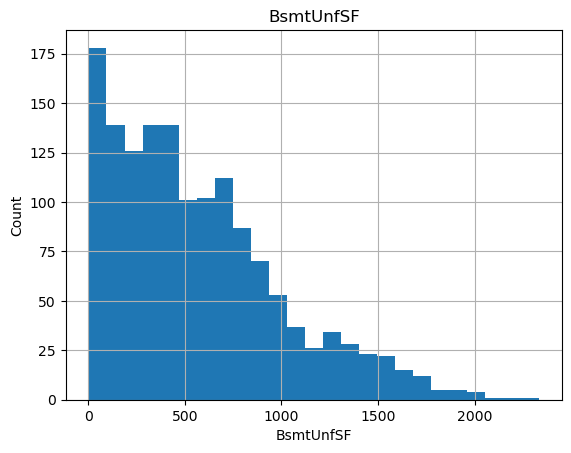

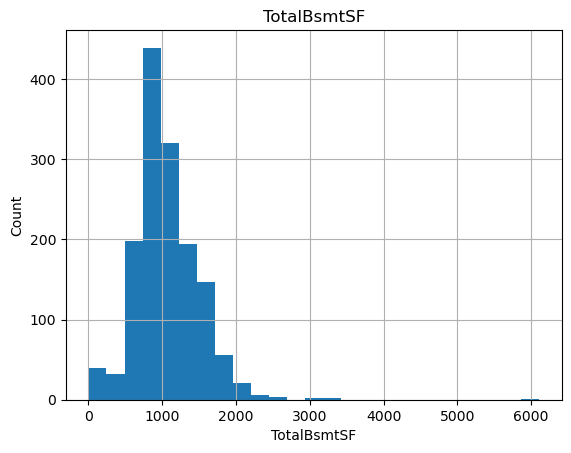

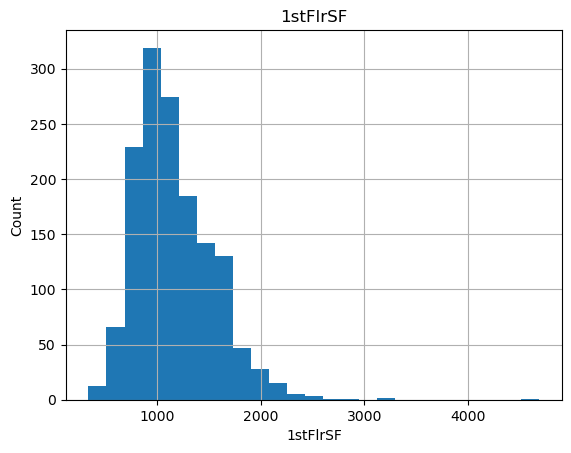

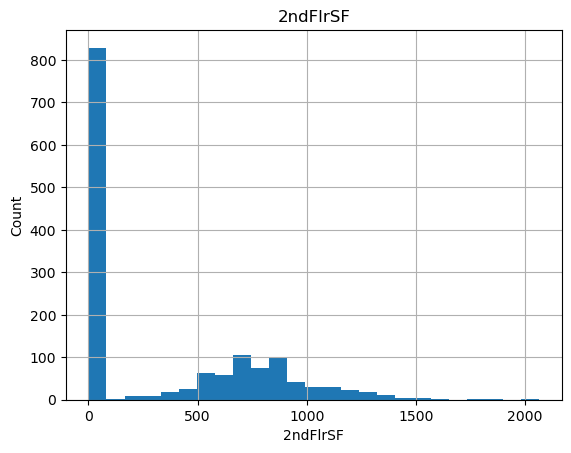

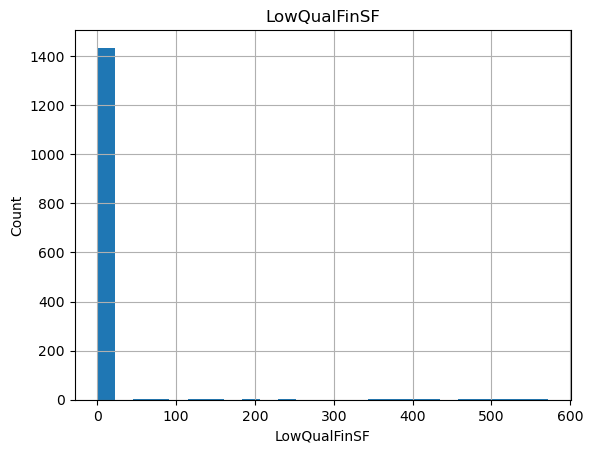

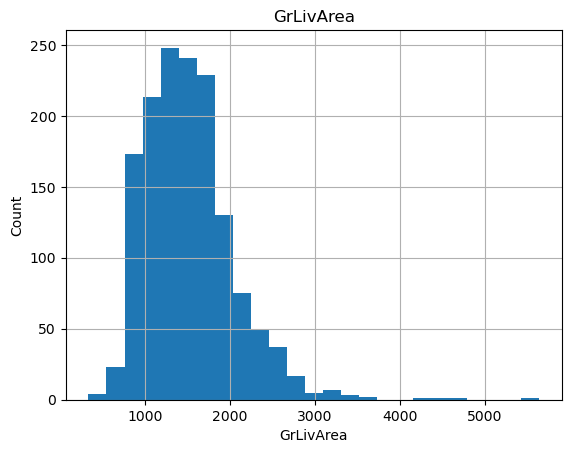

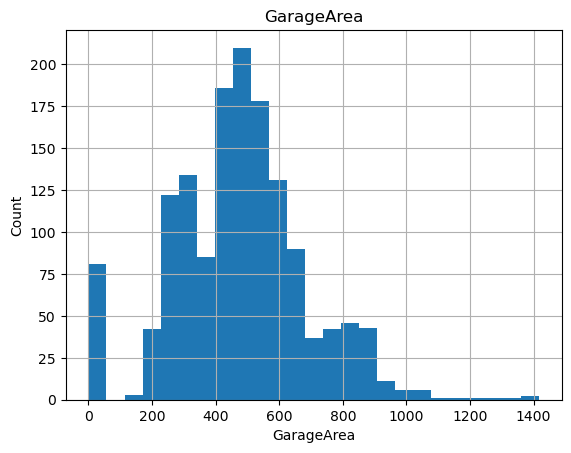

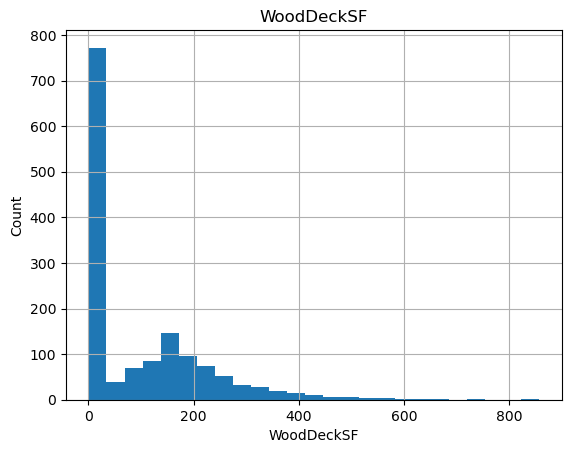

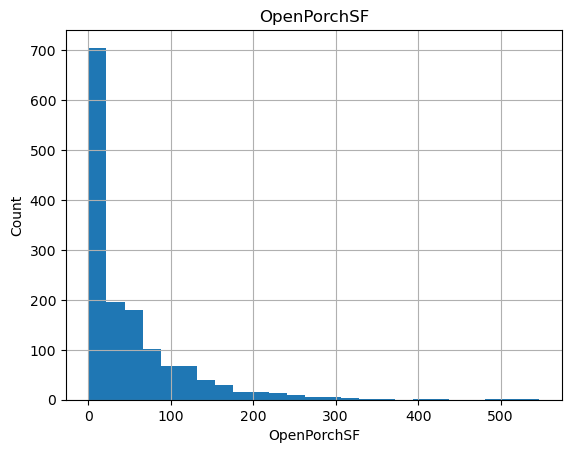

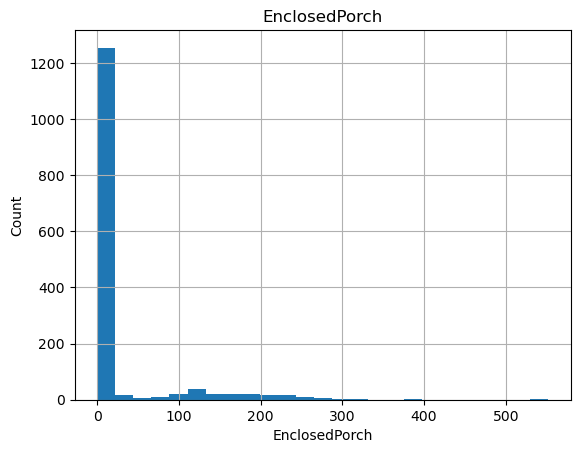

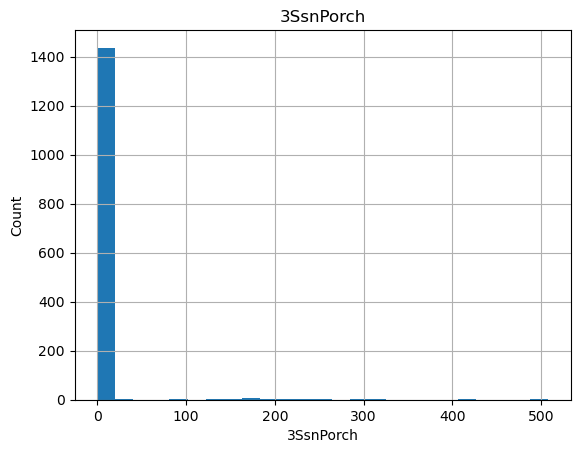

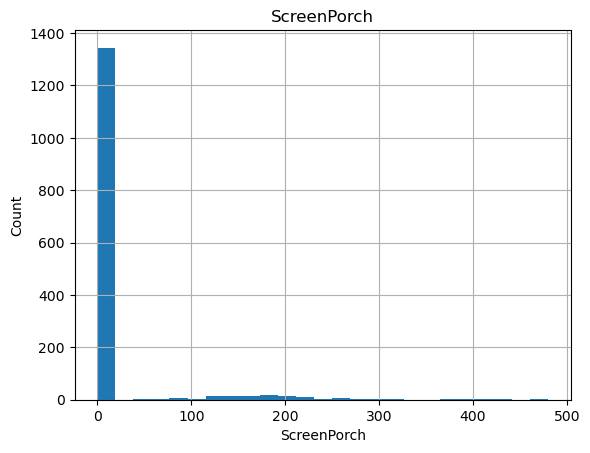

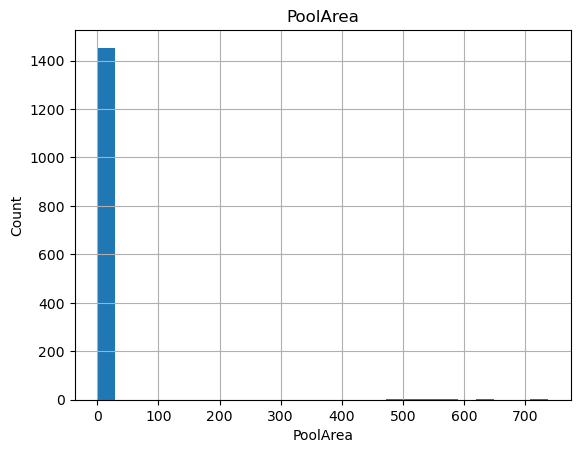

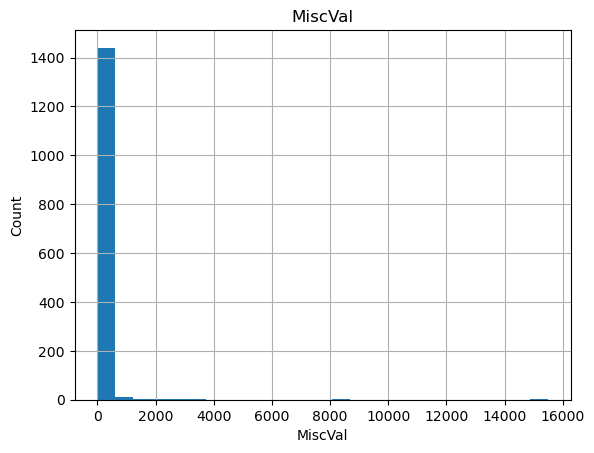

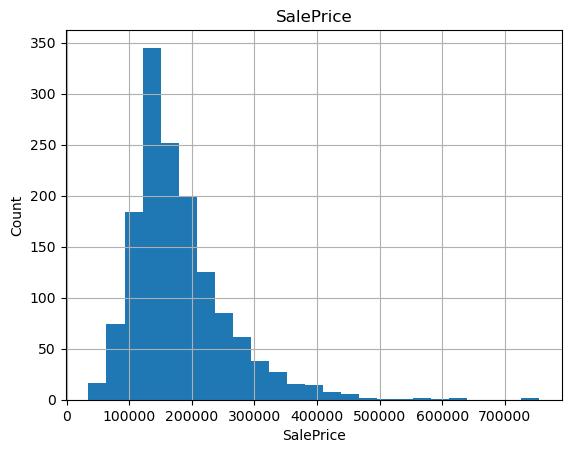

In [18]:
# Analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

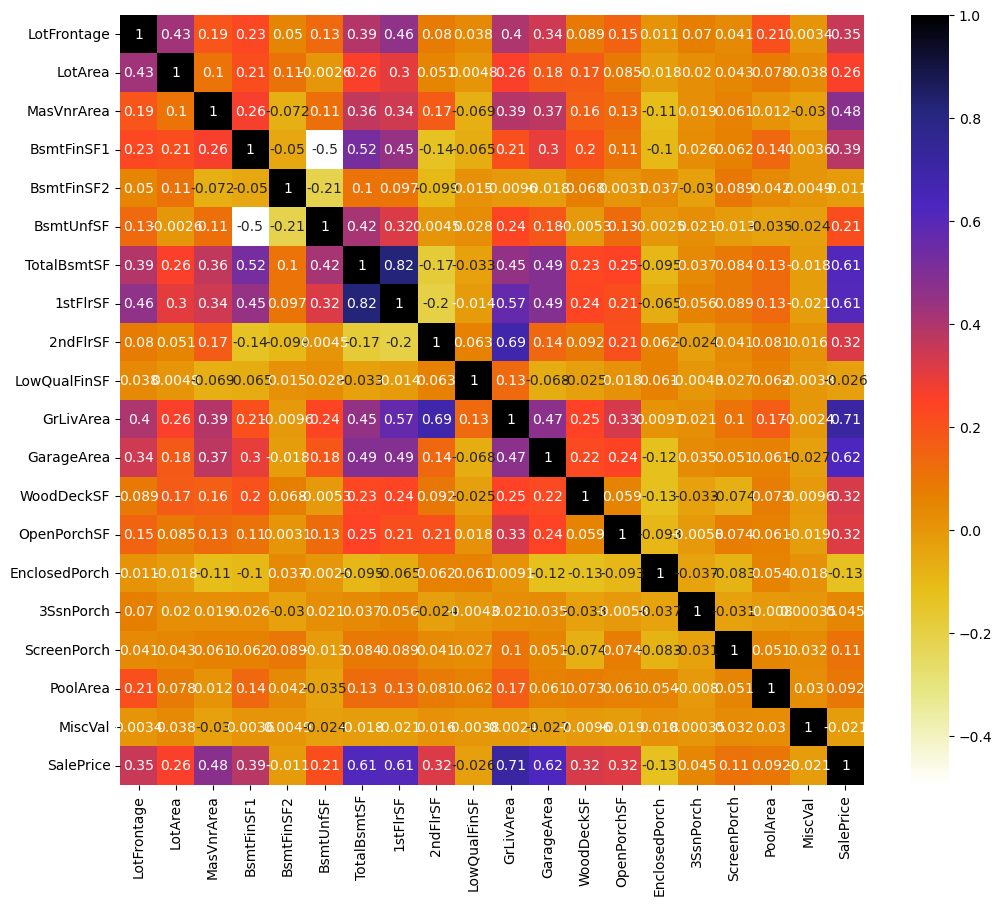

In [19]:
# Finding the correlation
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset[continuous_feature].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [20]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(dataset[continuous_feature], 0.6)
print(set(corr_features))

{'GrLivArea', 'SalePrice', '1stFlrSF'}


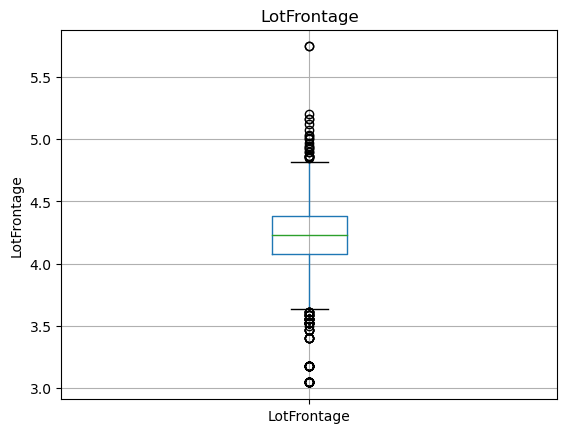

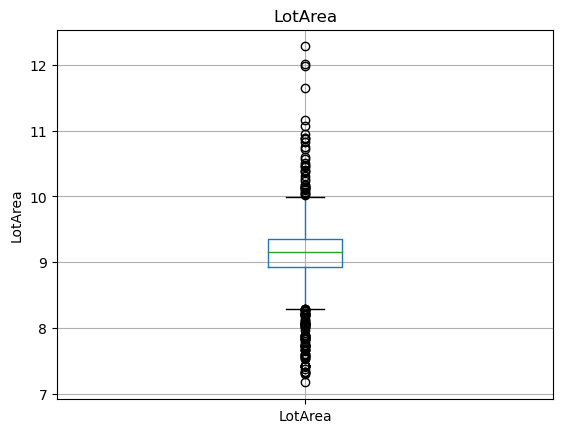

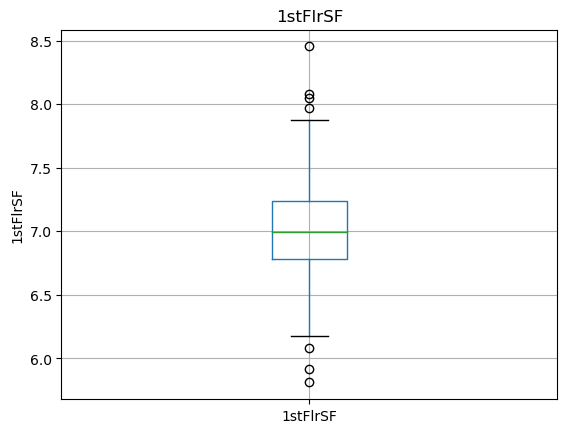

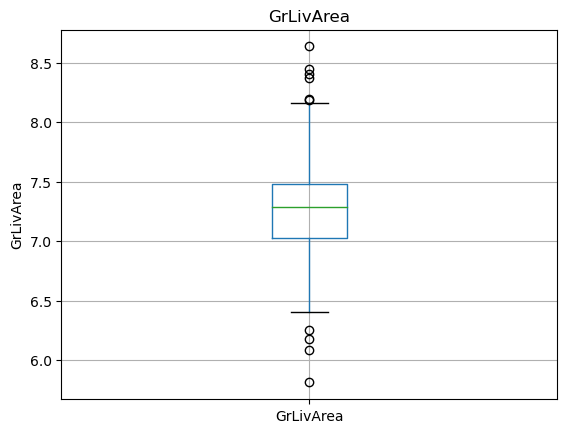

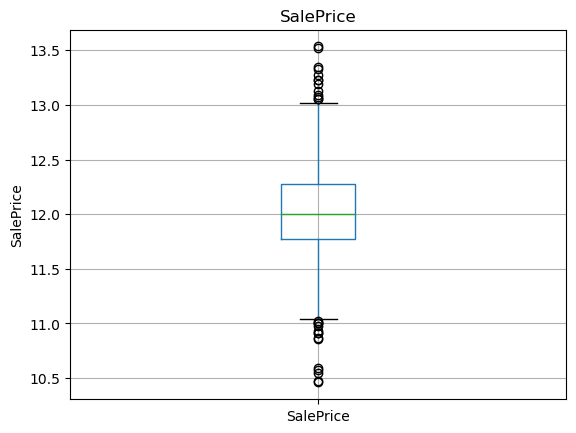

In [21]:
# Checking for Outliers:

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature]. unique(): # This code removes the features that has values 0 because since most of it values 
                                    # are zero many points will be labelled as outliers
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [22]:
# Finding the categorical features

categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
print("The number of categorical variables are ", len(categorical_features))
dataset[categorical_features].head()

The number of categorical variables are  43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [23]:
# Finding all the values of these categorical variable

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

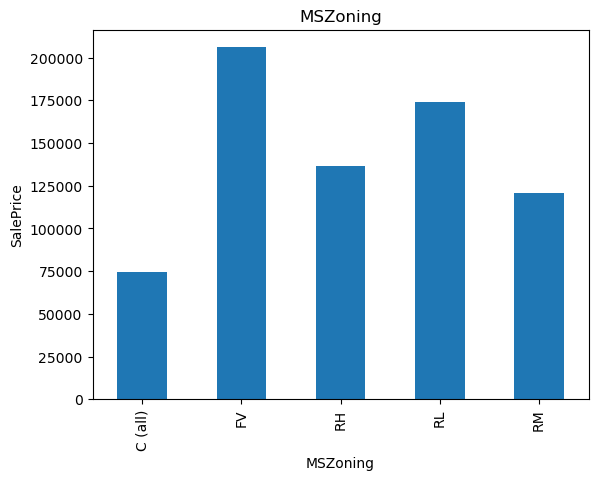

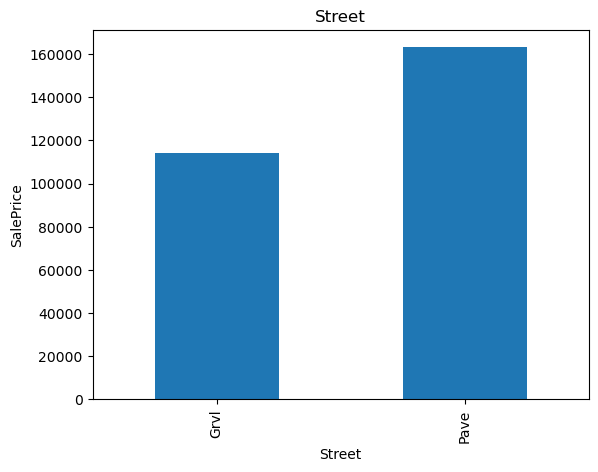

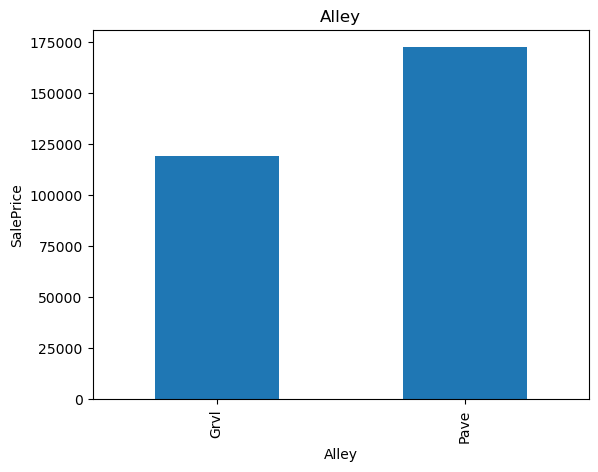

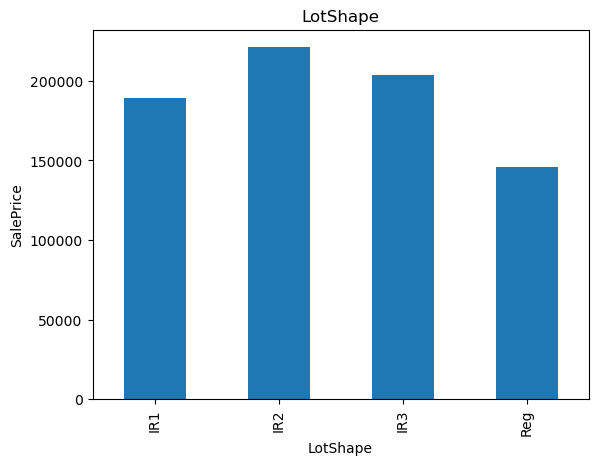

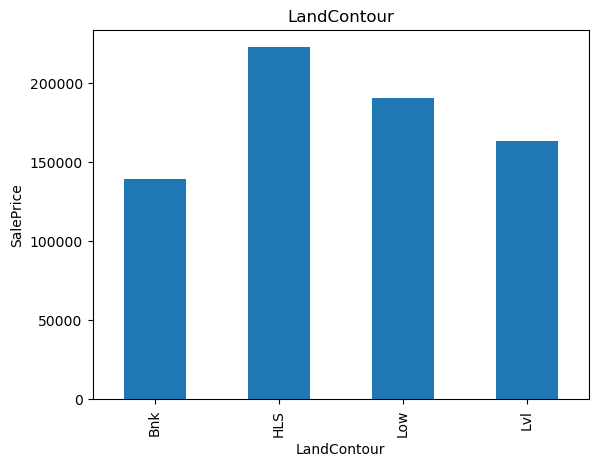

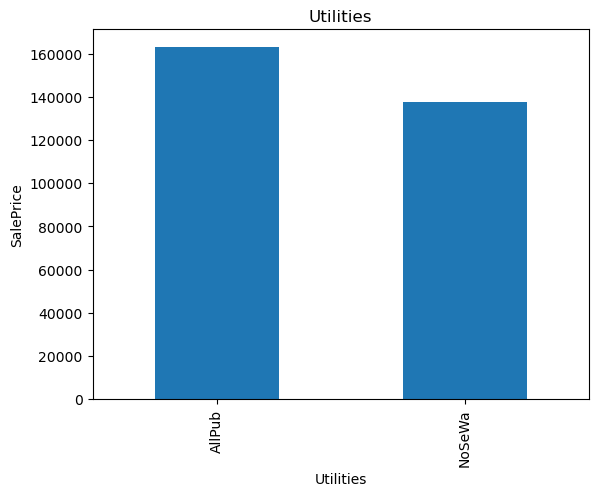

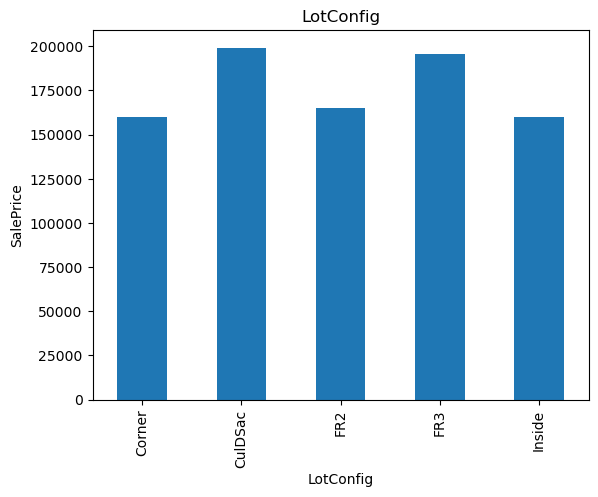

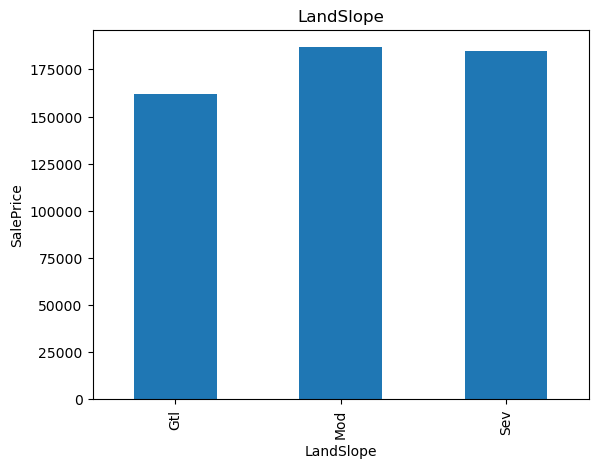

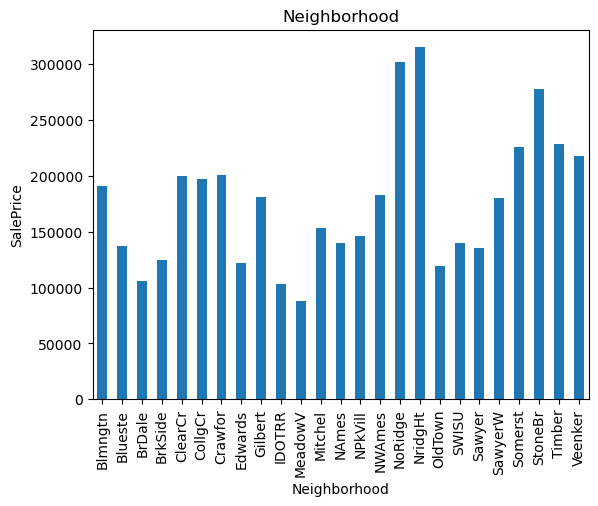

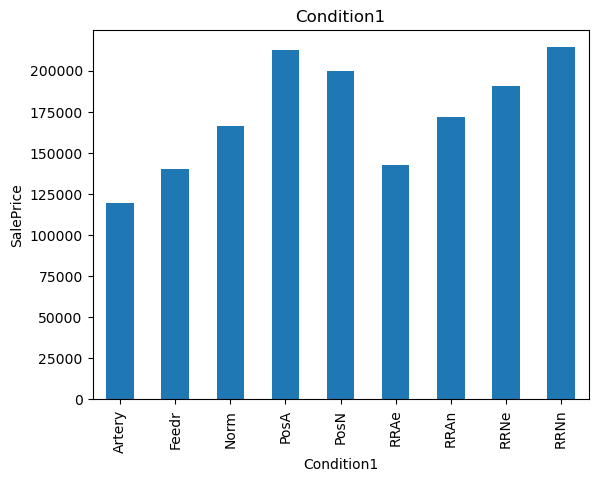

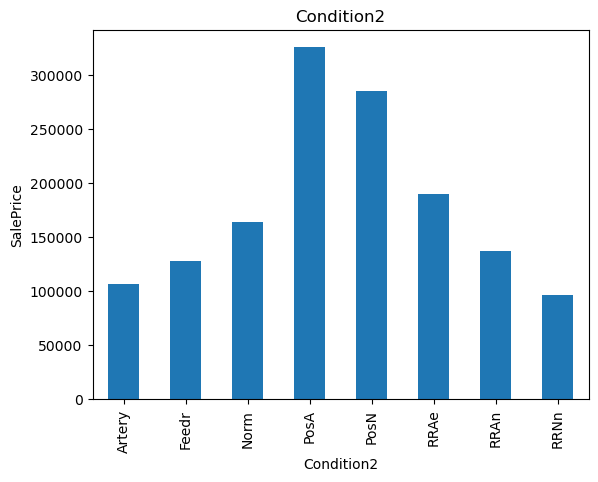

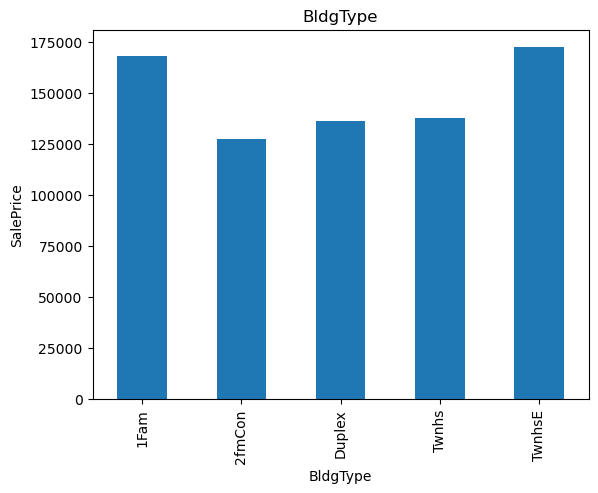

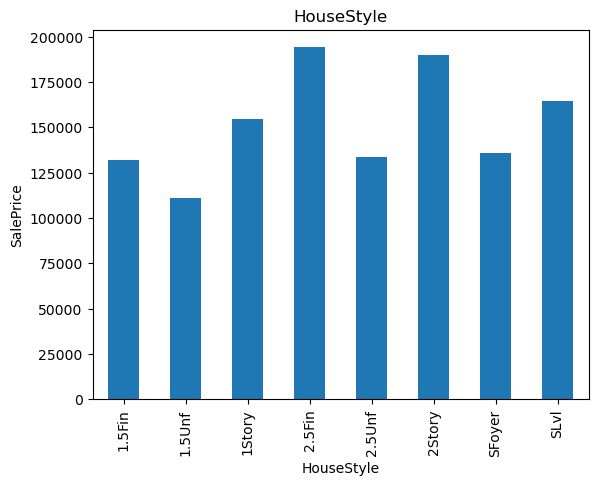

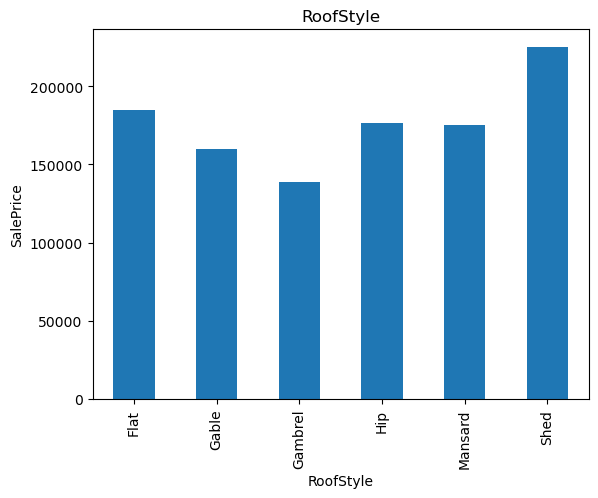

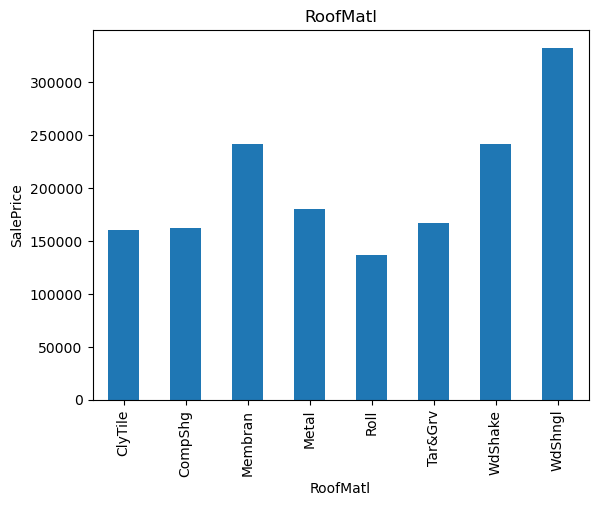

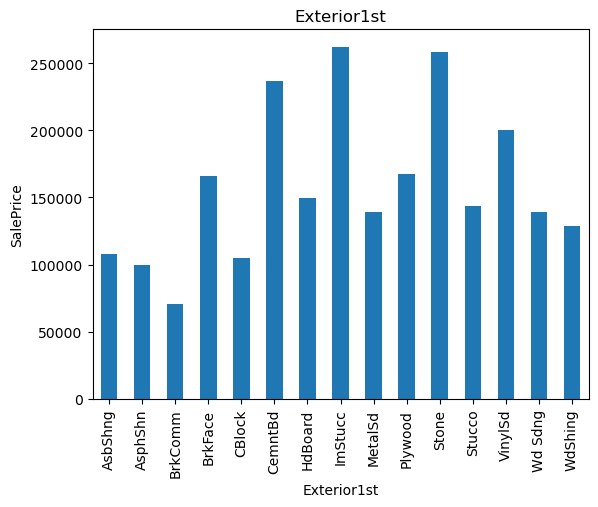

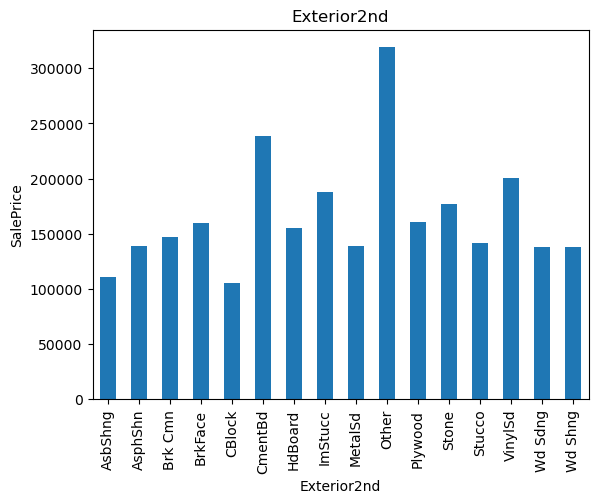

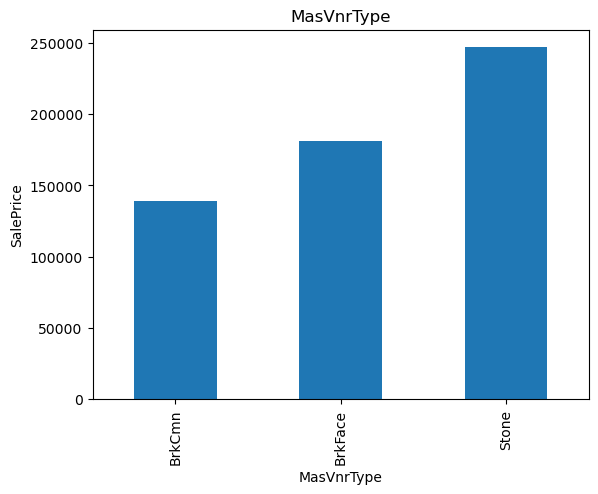

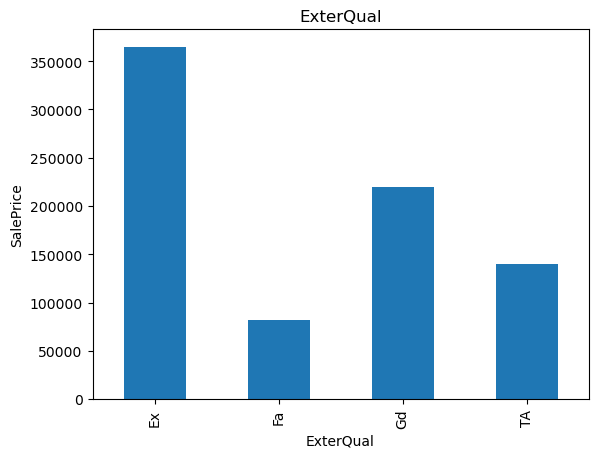

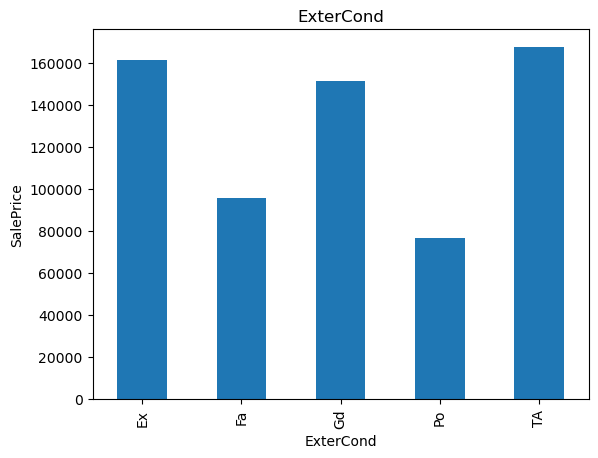

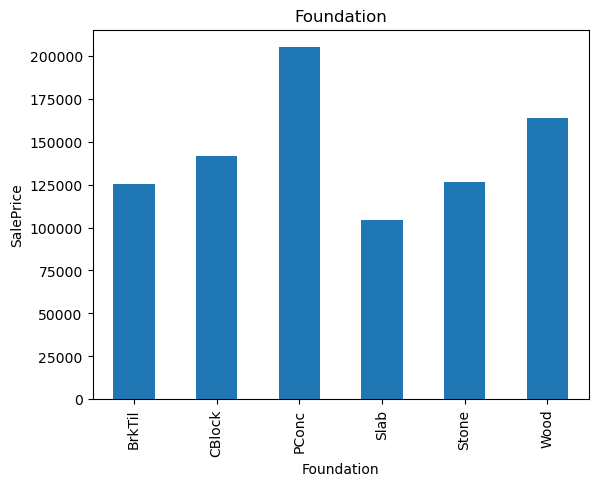

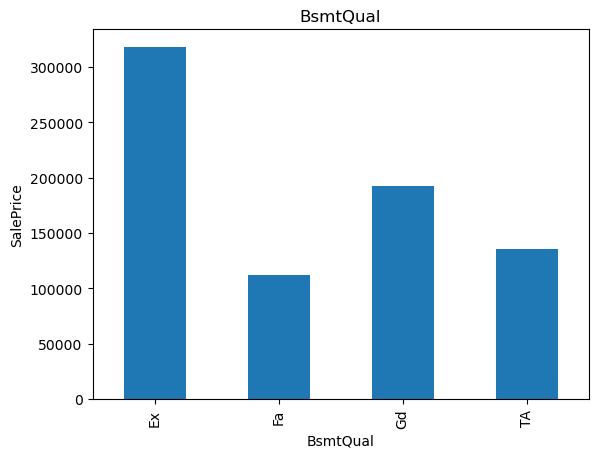

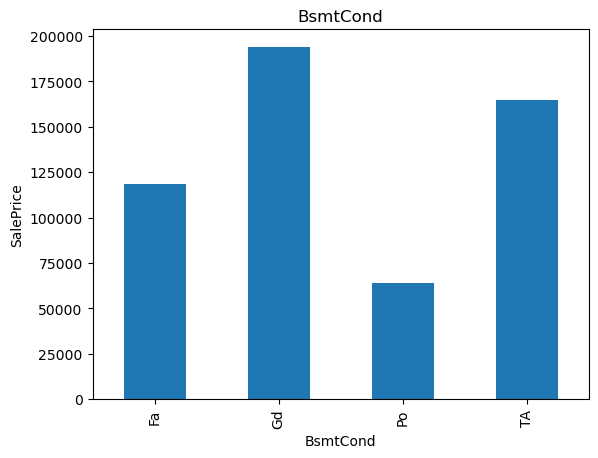

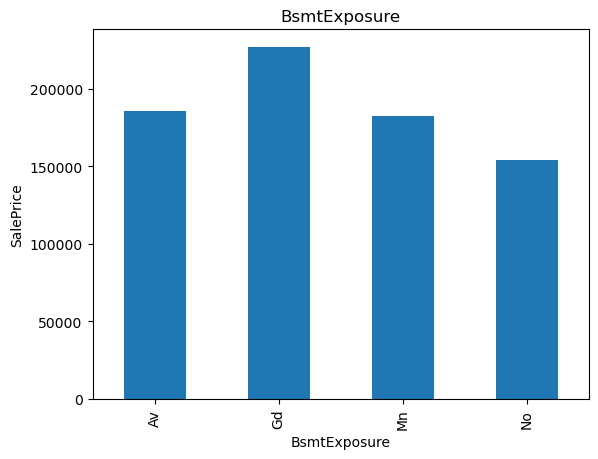

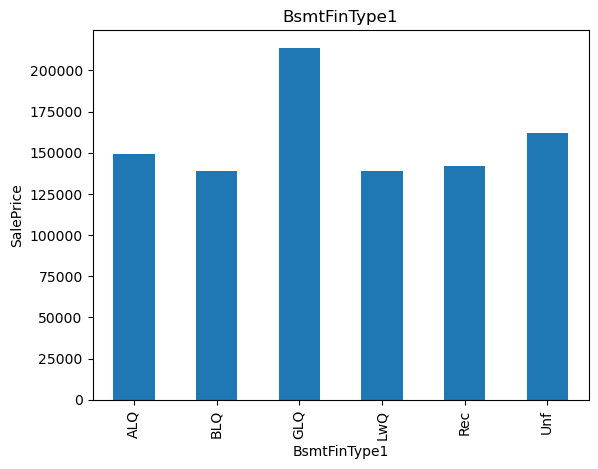

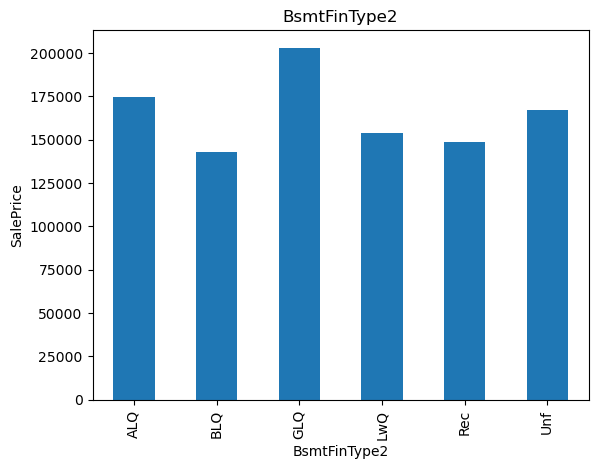

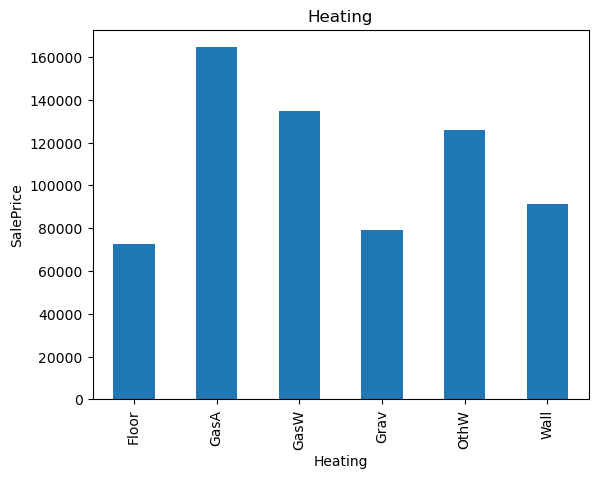

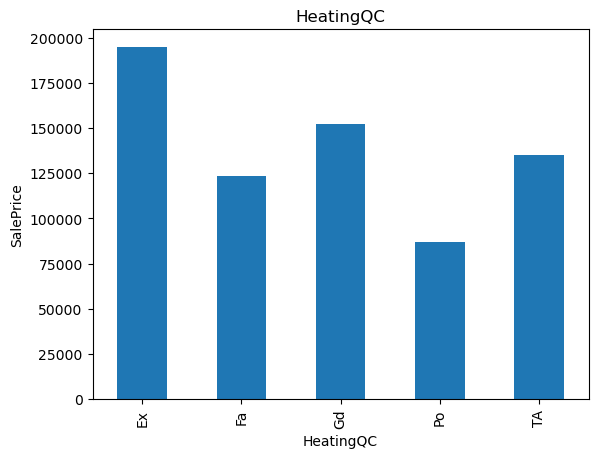

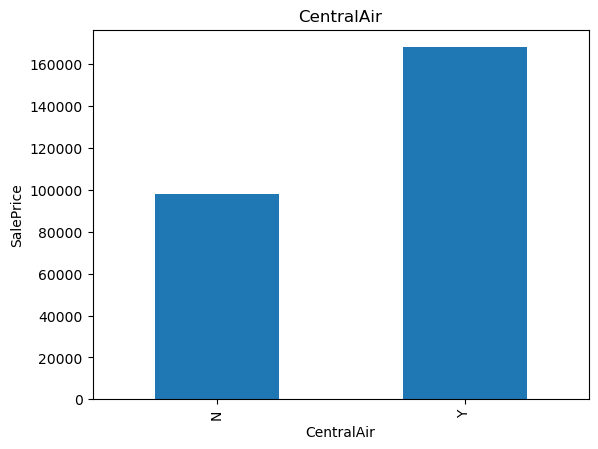

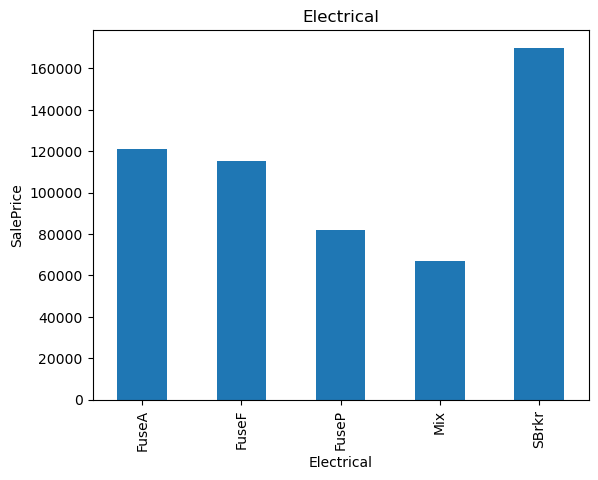

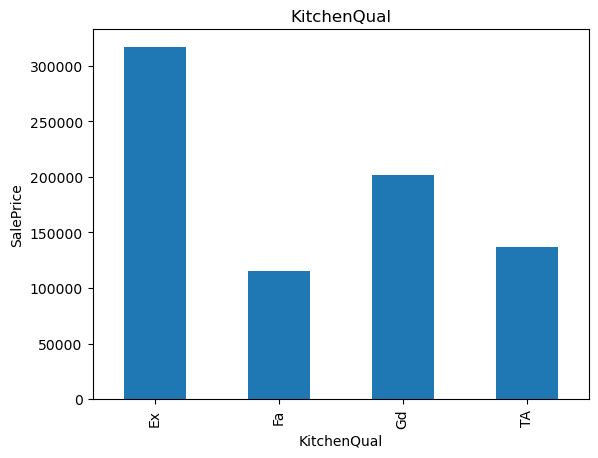

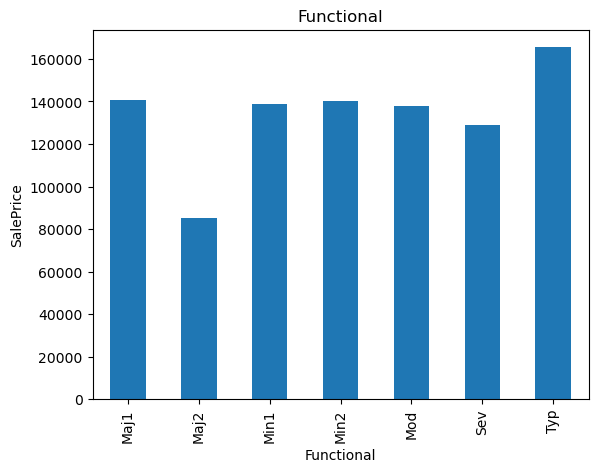

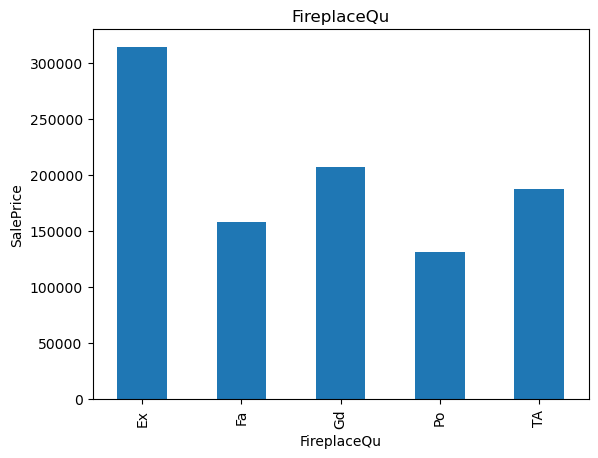

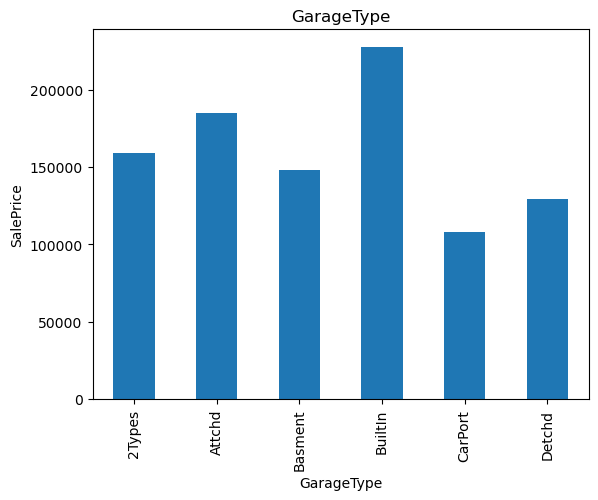

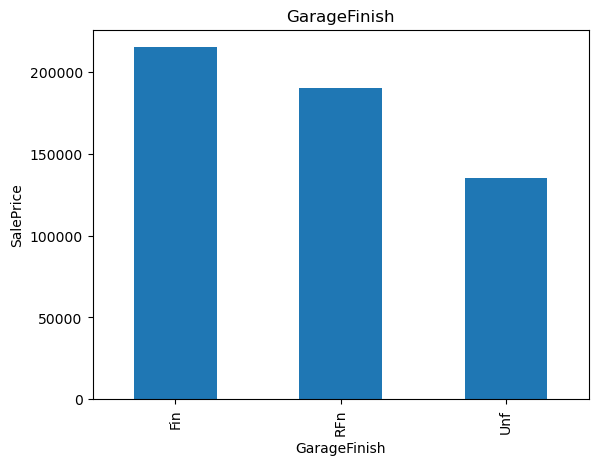

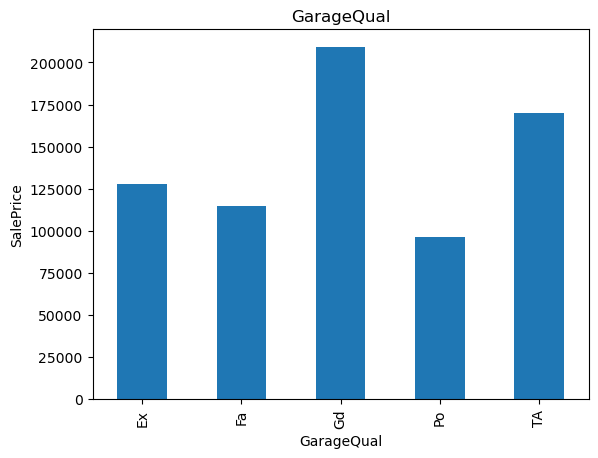

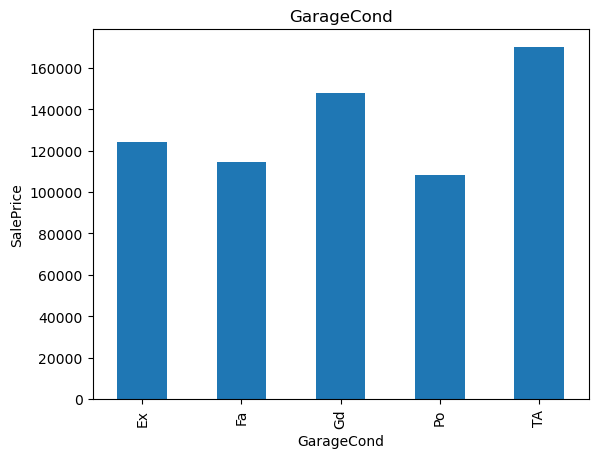

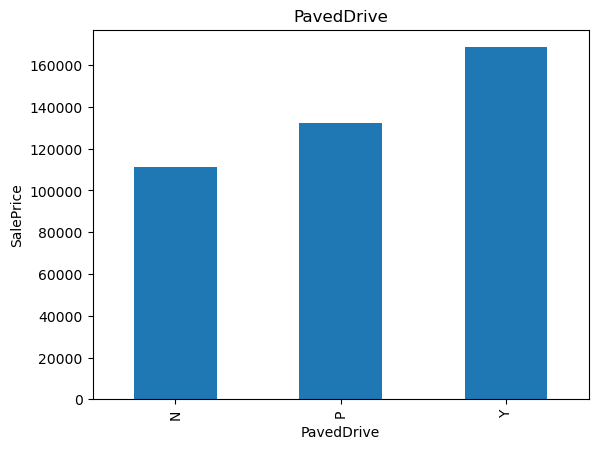

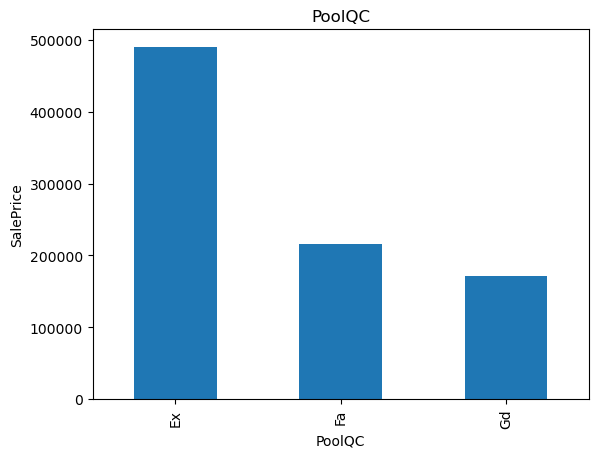

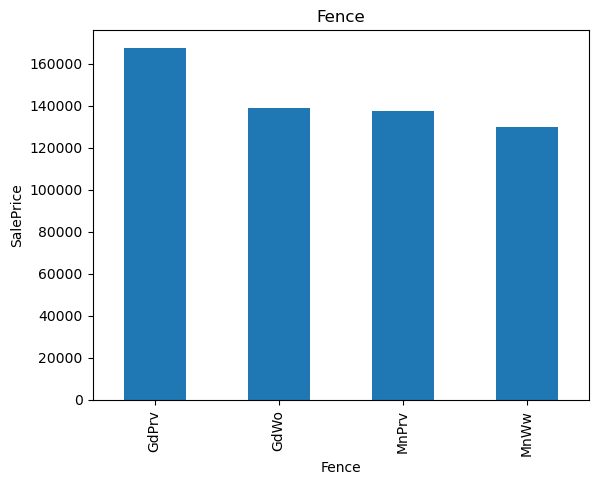

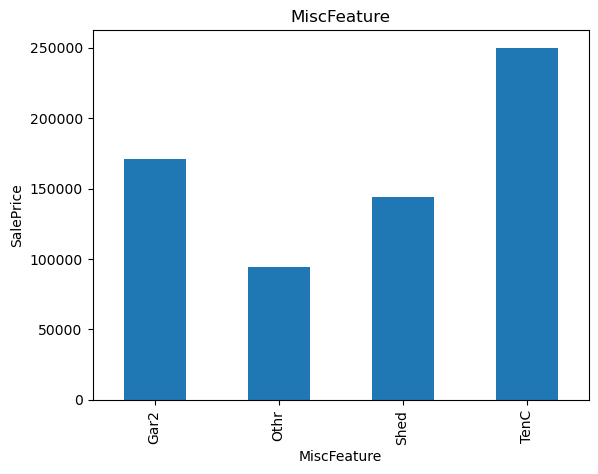

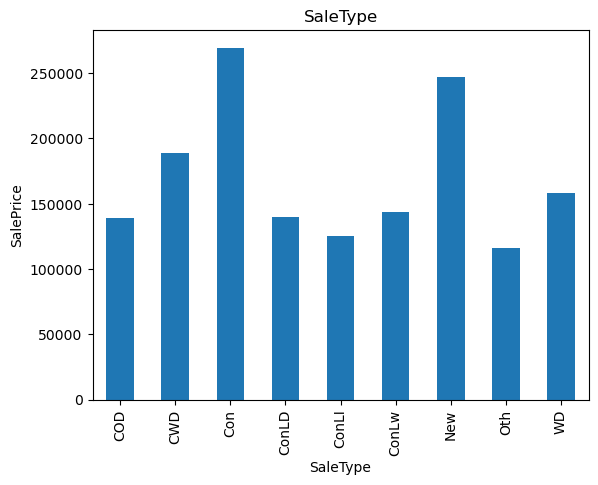

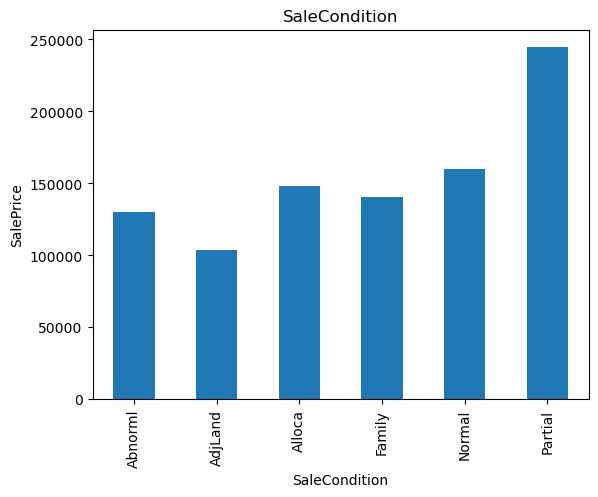

In [24]:
# Find out the relationship between categorical variable and dependent feature SalesPrice

for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [25]:
# Printing all the categorical variables with null values

print(categorical_features_with_na)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [26]:
# Replace missing value with a new label called missing as the missing values are not missing by random manner

def replace_cat_feature(dataset,categorical_features_with_na):
    data=dataset.copy()
    data[categorical_features_with_na]=data[categorical_features_with_na].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,categorical_features_with_na)

dataset[categorical_features_with_na].isnull().sum()


Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [27]:
# Printing the numerical nan variables and percentage of missing values

for feature in numerical_features_with_na:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [28]:
## Replacing the numerical Missing Values

for feature in numerical_features_with_na:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_features_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [29]:
# Handling Date Time Variables

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [30]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [31]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(12,6))
    plt.subplots_adjust(bottom=0.2)
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    plt.xlabel(feature)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

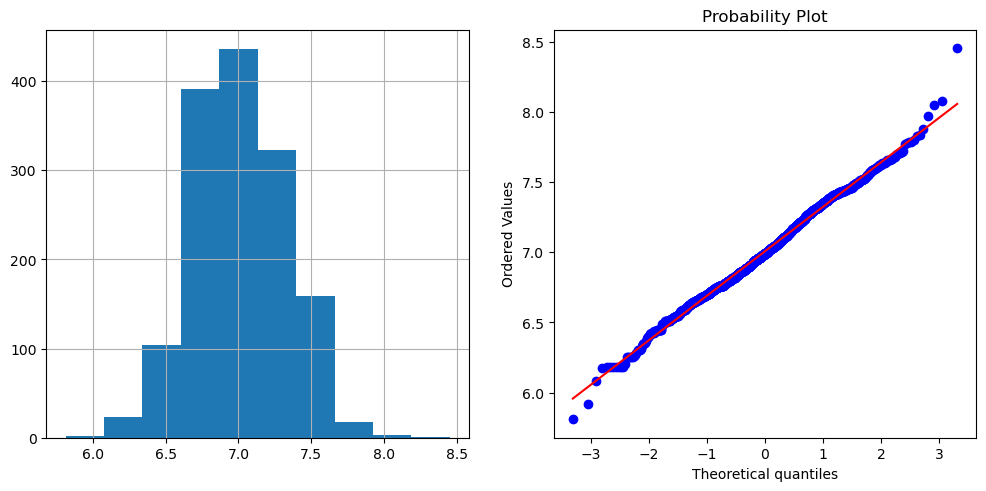

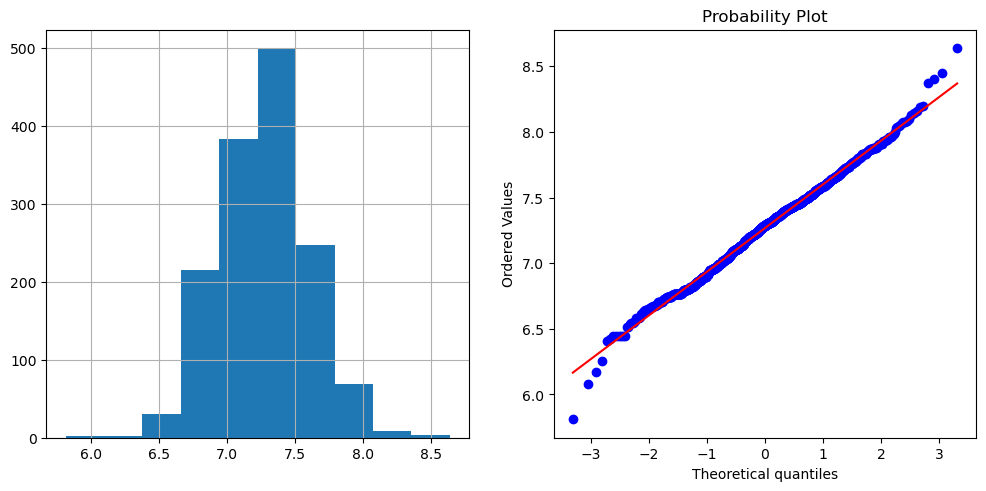

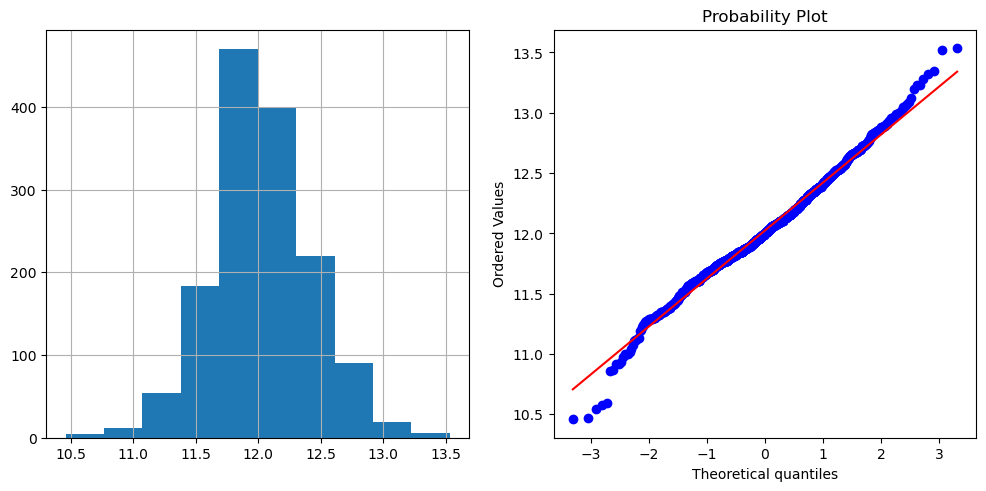

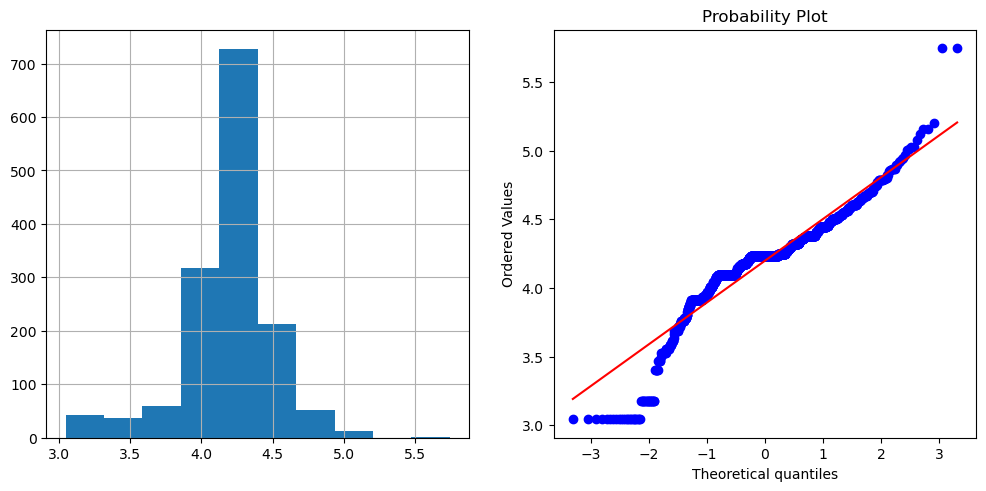

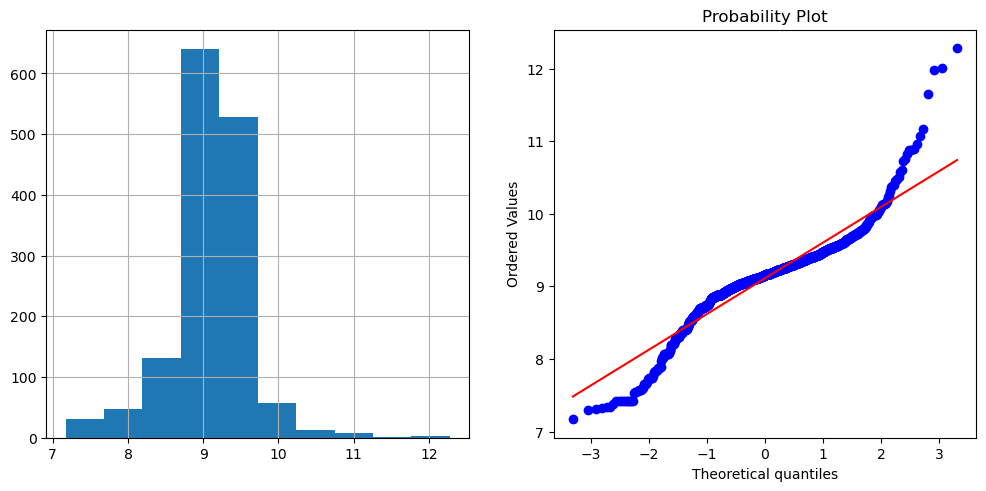

In [32]:
# Log Transform for only the seleted non zero values variables
df = dataset.copy()
num_features=['1stFlrSF', 'GrLivArea', 'SalePrice','LotFrontage', 'LotArea']
for feature in num_features:
    df[feature]=np.log(df[feature])
    plot_data(df,feature)

In [33]:
# Since the distribution are skewed we use log transform
num_features=['1stFlrSF', 'GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea',]

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [34]:
# Handling Rare Categorical values

for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [35]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,TA,TA,Rare_var,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.234107,9.247829,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,G

In [36]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,Missing,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,Missing,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [37]:
# Priniting all the categorical features

print(categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [38]:
nominal_categorical_feature = ['MSZoning', 'Street','Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                                'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                                'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterCond', 'Foundation','BsmtCond', 'BsmtExposure',
                                'BsmtQual','Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'GarageCond', 
                                'PavedDrive','MiscFeature', 'SaleType', 'SaleCondition']
ordinal_categorical_feature = ['ExterQual', 'BsmtFinType1', 'BsmtFinType2','HeatingQC','KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual',
                                'PoolQC', 'Fence']

In [39]:
# Encoding for the ordinal categorical feature (Target Guided Encoding)

for feature in ordinal_categorical_feature:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)
dataset[ordinal_categorical_feature].head()

,ExterQual,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageQual,PoolQC,Fence
0,2,6,5,4,2,4,1,2,0,4
1,1,4,5,4,1,4,3,2,0,4
2,2,6,5,4,2,4,3,2,0,4
3,1,4,5,3,2,4,4,2,0,4
4,2,6,5,4,2,4,3,2,0,4


In [40]:
# Encoding for the nominal categorical variable (Mean Encoding)

for feature in nominal_categorical_feature:
    nominal_label = dataset.groupby([feature])['SalePrice'].mean().to_dict()
    dataset[feature]=dataset[feature].map(nominal_label)
dataset[nominal_categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterCond,Foundation,BsmtCond,BsmtExposure,BsmtQual,Heating,CentralAir,Electrical,GarageType,GarageFinish,GarageCond,PavedDrive,MiscFeature,SaleType,SaleCondition
0,12.085885,12.025522,12.037675,11.936094,12.022694,12.024183,12.001900,12.020565,12.163641,12.042916,12.025895,12.047512,12.182686,11.9842,12.019216,12.205873,12.209631,12.163630,12.043078,12.261665,12.042615,11.955653,12.179882,12.032078,12.06109,12.061464,12.160778,12.172672,12.070483,12.059895,12.030112,11.991061,12.005034
1,12.085885,12.025522,12.037675,11.936094,12.022694,12.024183,12.034741,12.020565,12.101696,11.818334,12.025895,12.047512,11.993683,11.9842,12.019216,11.859767,11.862286,11.896884,12.043078,11.870080,12.042615,12.364359,12.179882,12.032078,12.06109,12.061464,12.160778,12.172672,12.070483,12.059895,12.030112,11.991061,12.005034
2,12.085885,12.025522,12.037675,12.163465,12.022694,12.024183,12.001900,12.020565,12.163641,12.042916,12.025895,12.047512,12.182686,11.9842,12.019216,12.205873,12.209631,12.163630,12.043078,12.261665,12.042615,12.094819,12.179882,12.032078,12.06109,12.061464,12.160778,12.172672,12.070483,12.059895,12.030112,11.991061,12.005034
3,12.085885,12.025522,12.037675,12.163465,12.022694,12.024183,12.027446,12.020565,12.206659,12.042916,12.025895,12.047512,12.182686,11.9842,12.019216,11.838506,11.892242,11.896884,12.043078,11.722528,12.220279,11.955653,11.810855,12.032078,12.06109,12.061464,11.765643,11.818974,12.070483,12.059895,12.030112,11.991061,11.788774
4,12.085885,12.025522,12.037675,12.163465,12.022694,12.024183,12.034741,12.020565,12.676000,12.042916,12.025895,12.047512,12.182686,11.9842,12.019216,12.205873,12.209631,12.163630,12.043078,12.261665,12.042615,12.158267,12.179882,12.032078,12.06109,12.061464,12.160778,12.172672,12.070483,12.059895,12.030112,11.991061,12.005034


In [41]:
# Removing the outliers

for feature in continuous_feature:
    IQR=dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
    lower_bridge=dataset[feature].quantile(0.25)-(IQR*3)
    upper_bridge=dataset[feature].quantile(0.75)+(IQR*3)
    dataset.loc[dataset[feature]<=lower_bridge,feature]=lower_bridge
    dataset.loc[dataset[feature]>=upper_bridge,feature]=upper_bridge
dataset[continuous_feature].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000
mean,4.202646,9.109173,98.606849,441.725342,0.0,567.240411,1054.197089,7.007501,346.992466,0.0,7.267774,472.800342,94.035616,45.666438,0.0,0.0,0.0,0.0,0.0,12.024051
std,0.301690,0.484414,160.137035,439.831280,0.0,441.866955,416.304632,0.317730,436.528436,0.0,0.333550,213.067226,124.256986,61.383739,0.0,0.0,0.0,0.0,0.0,0.399452
min,3.269035,7.642394,0.000000,0.000000,0.0,0.000000,0.000000,5.811141,0.000000,0.0,5.811141,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,10.460242
25%,4.094345,8.929766,0.000000,0.000000,0.0,223.000000,795.750000,6.782192,0.000000,0.0,7.029530,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,11.775097
50%,4.234107,9.156781,0.000000,383.500000,0.0,477.500000,991.500000,6.991176,0.000000,0.0,7.288928,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,12.001505
75%,4.369448,9.358890,164.250000,712.250000,0.0,808.000000,1298.250000,7.237958,728.000000,0.0,7.482541,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,12.273731
max,5.194758,10.646261,657.000000,2849.000000,0.0,2336.000000,2805.750000,8.453614,2065.000000,0.0,8.637994,1300.500000,672.000000,272.000000,0.0,0.0,0.0,0.0,0.0,13.534473


In [42]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,12.085885,4.174387,9.041922,12.025522,12.037675,11.936094,12.022694,12.024183,12.001900,12.020565,12.163641,12.042916,12.025895,12.047512,12.182686,7,5,5,5,11.9842,12.019216,12.205873,12.209631,12.163630,196.0,2,12.043078,12.261665,12.179882,12.042615,11.955653,6,706.0,5,0,150,856.0,12.032078,4,12.06109,12.061464,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,12.160778,5.0,12.172672,2,548.0,2,12.070483,12.059895,0,61,0,0,0,0,0,4,12.030112,0,2,2008,11.991061,12.005034,12.247694,0,0,0
1,2,20,12.085885,4.382027,9.169518,12.025522,12.037675,11.936094,12.022694,12.024183,12.034741,12.020565,12.101696,11.818334,12.025895,12.047512,11.993683,6,8,31,31,11.9842,12.019216,11.859767,11.862286,11.896884,0.0,1,12.043078,11.870080,12.179882,12.042615,12.364359,4,978.0,5,0,284,1262.0,12.032078,4,12.06109,12.061464,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,12.160778,31.0,12.172672,2,460.0,2,12.070483,12.059895,298,0,0,0,0,0,0,4,12.030112,0,5,2007,11.991061,12.005034,12.109011,0,0,0
2,3,60,12.085885,4.219508,9.328123,12.025522,12.037675,12.163465,12.022694,12.024183,12.001900,12.020565,12.163641,12.042916,12.025895,12.047512,12.182686,7,5,7,6,11.9842,12.019216,12.205873,12.209631,12.163630,162.0,2,12.043078,12.261665,12.179882,12.042615,12.094819,6,486.0,5,0,434,920.0,12.032078,4,12.06109,12.061464,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,12.160778,7.0,12.172672,2,608.0,2,12.070483,12.059895,0,42,0,0,0,0,0,4,12.030112,0,9,2008,11.991061,12.005034,12.317167,0,0,0
3,4,70,12.085885,4.094345,9.164296,12.025522,12.037675,12.163465,12.022694,12.024183,12.027446,12.020565,12.206659,12.042916,12.025895,12.047512,12.182686,7,5,91,36,11.9842,12.019216,11.838506,11.892242,11.896884,0.0,1,12.043078,11.722528,11.810855,12.220279,11.955653,4,216.0,5,0,540,756.0,12.032078,3,12.06109,12.061464,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,11.765643,8.0,11.818974,3,642.0,2,12.070483,12.059895,0,35,0,0,0,0,0,4,12.030112,0,2,2006,11.991061,11.788774,11.849398,0,0,0
4,5,60,12.085885,4.430817,9.565214,12.025522,12.037675,12.163465,12.022694,12.024183,12.034741,12.020565,12.676000,12.042916,12.025895,12.047512,12.182686,8,5,8,8,11.9842,12.019216,12.205873,12.209631,12.163630,350.0,2,12.043078,12.261665,12.179882,12.042615,12.158267,6,655.0,5,0,490,1145.0,12.032078,4,12.06109,12.061464,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,12.160778,8.0,12.172672,3,836.0,2,12.070483,12.059895,192,84,0,0,0,0,0,4,12.030112,0,12,2008,11.991061,12.005034,12.429216,0,0,0


In [43]:
# Lasso Model Selection

# It just not only reduces the overfitting but also helps in feature selection. Here the modulus so the slope which are very
# small are removed so the less important features are removed.
# because mathematically here the slop of the line will reach zero

In [44]:
# Feature Selection using the Lasso Model

X = dataset.drop(['Id','SalePrice'],axis=1)
Y = dataset[['SalePrice']]
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, Y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [45]:
# Printing the number of total and selected features

# Making a list of the selected features

selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 82
selected features: 23


In [46]:
# Independent variables with the selected features

X_selected =X[selected_feat]
X_selected.head()

,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence
0,60,9.041922,12.163641,7,5,5,5,150,856.0,4,6.752270,854,2,8,4,0,1,5.0,2,548.0,0,61,4
1,20,9.169518,12.101696,6,8,31,31,284,1262.0,4,7.140453,0,1,6,4,1,3,31.0,2,460.0,298,0,4
2,60,9.328123,12.163641,7,5,7,6,434,920.0,4,6.824374,866,2,6,4,1,3,7.0,2,608.0,0,42,4
3,70,9.164296,12.206659,7,5,91,36,540,756.0,3,6.867974,756,2,7,4,1,4,8.0,3,642.0,0,35,4
4,60,9.565214,12.676000,8,5,8,8,490,1145.0,4,7.043160,1053,2,9,4,1,3,8.0,3,836.0,192,84,4


In [47]:
# Test Train Split

X_train,X_test,y_train,y_test=train_test_split(X_selected,Y,test_size=0.1,random_state=0)
X_train.shape, X_test.shape

((1314, 23), (146, 23))

In [48]:
# Feature Scaling

X_copy = X_train.copy()
scaler=MinMaxScaler()
scaler.fit(X_copy)
X_train_data = pd.DataFrame(scaler.transform(X_copy), columns=selected_feat)
X_test_data = pd.DataFrame(scaler.transform(X_test), columns=selected_feat)

In [49]:
X_train_data.shape

(1314, 23)

In [50]:
print(X_test_data.shape)
X_test_data.head()

(146, 23)


,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence
0,0.000000,0.916072,0.618146,0.555556,0.250,0.367647,0.540984,0.379006,0.725296,0.5,0.764014,0.000000,0.333333,0.583333,0.0,0.666667,0.6,0.299065,0.50,0.372165,0.000000,0.000000,1.0
1,0.176471,0.504550,0.342651,0.555556,0.750,0.477941,0.934426,0.110543,0.287267,0.5,0.398758,0.331197,0.000000,0.250000,1.0,0.666667,0.6,0.607477,0.25,0.184544,0.000000,0.000000,0.5
2,0.176471,0.403950,0.189436,0.444444,0.375,0.433824,0.983607,0.243381,0.252695,0.5,0.406964,0.119658,0.666667,0.250000,1.0,0.333333,0.6,0.551402,0.25,0.270665,0.000000,0.000000,1.0
3,0.235294,0.522142,0.645191,0.666667,0.500,0.227941,0.524590,0.356712,0.413437,1.0,0.469855,0.462607,0.333333,0.500000,1.0,0.333333,0.6,0.289720,0.50,0.388312,0.428571,0.430147,1.0
4,0.823529,0.000000,0.082153,0.555556,0.500,0.286765,0.655738,0.243846,0.187116,0.5,0.171149,0.302885,0.333333,0.333333,1.0,0.000000,0.2,0.364486,0.25,0.202999,0.000000,0.000000,1.0


In [51]:
# Performing Linear Regression

model = LinearRegression()

model.fit(X_train_data, y_train)

# Make predictions on the testing data

y_pred = model.predict(X_test_data)

# Evaluate the model performance (e.g., R-squared, Mean Squared Error)

r2_linear = r2_score(y_test, y_pred)

# Calculate the adjusted R²

n = X_test_data.shape[0]  # Number of observations (samples) in the testing set
p = X_test_data.shape[1]  # Number of features in the model
adjusted_r2_linear = 1 - (1 - r2_linear) * (n - 1) / (n - p - 1)
mse_linear = mean_squared_error(y_test, y_pred)
print("The R2 score is ",r2_linear)
print("The Mean squared error is ",mse_linear)
print("The adjusted R2 score is ",adjusted_r2_linear)

The R2 score is  0.9006398099183264
The Mean squared error is  0.013605617616749372
The adjusted R2 score is  0.8819079708045683


In [52]:
# Performing Polynomial Regression

# Create the polynomial feature transformer

poly = PolynomialFeatures(degree=2) 

# Create a pipeline combining the transformer and linear regression model

from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', poly),
    ('linear_model', LinearRegression())
])
# Train the model on the training data

model.fit(X_train_data, y_train)

# Make predictions on the testing data

y_pred = model.predict(X_test_data)

# Evaluate the model performance (e.g., R-squared, Mean Squared Error)

r2_poly = r2_score(y_test, y_pred)
mse_poly = mean_squared_error(y_test, y_pred)

# Calculate the adjusted R²

n = X_test_data.shape[0]  # Number of observations (samples) in the testing set
p = X_test_data.shape[1]  # Number of features in the model
adjusted_r2_poly = 1 - (1 - r2_poly) * (n - 1) / (n - p - 1)

print("R-squared:", r2_poly)
print("Mean Squared Error:", mse_poly)
print("Adjusted_R2_score", adjusted_r2_poly)

R-squared: 0.8287612862575062
Mean Squared Error: 0.023448107923800095
Adjusted_R2_score 0.7964785779290033


In [53]:
# Performing Support Vector Regrssion

# Create the SVR model

svr_model = SVR(kernel='rbf', C=1.0)  # Choose the kernel and adjust C as needed

# Train the model on the training data

svr_model.fit(X_train_data, y_train)

# Make predictions on the testing data

y_pred = svr_model.predict(X_test_data)

# Evaluate the model performance (e.g., R-squared, Mean Squared Error)

r2_SVR = r2_score(y_test, y_pred)
mse_SVR = mean_squared_error(y_test, y_pred)

# Calculate the adjusted R²

n = X_test_data.shape[0]  # Number of observations (samples) in the testing set
p = X_test_data.shape[1]  # Number of features in the model
adjusted_r2_SVR = 1 - (1 - r2_SVR) * (n - 1) / (n - p - 1)
print("Adjusted_R2", adjusted_r2_SVR)

print("R-squared:", r2_SVR)
print("Mean Squared Error:", mse_SVR)

Adjusted_R2 0.8830111613653991
R-squared: 0.9015680116315772
Mean Squared Error: 0.013478516837540696


C:\Users\harik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
# Performing using Randomn forest

# Create the Random Forest Regression model

rf_model = RandomForestRegressor(n_estimators=100)  # Adjust the number of trees as needed

# Train the model on the training data

rf_model.fit(X_train_data, y_train)

# Make predictions on the testing data

y_pred = rf_model.predict(X_test_data)

# Evaluate the model performance (e.g., R-squared, Mean Squared Error)

r2_RF = r2_score(y_test, y_pred)
mse_RF = mean_squared_error(y_test, y_pred)

# Calculate the adjusted R²

n = X_test_data.shape[0]  # Number of observations (samples) in the testing set
p = X_test_data.shape[1]  # Number of features in the model
adjusted_r2_RF = 1 - (1 - r2_RF) * (n - 1) / (n - p - 1)
print("Adjusted_R2", adjusted_r2_RF)

print("R-squared:", r2_RF)
print("Mean Squared Error:", mse_RF)

C:\Users\harik\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Adjusted_R2 0.8581871379338657
R-squared: 0.8806815919167698
Mean Squared Error: 0.01633854196218082


In [55]:
# Performing regression using decision tree

# Create the Decision Tree Regression model

dt_model = DecisionTreeRegressor(max_depth=5)  # Adjust the max_depth parameter as needed

# Train the model on the training data

dt_model.fit(X_train_data, y_train)

# Make predictions on the testing data

y_pred = dt_model.predict(X_test_data)

# Evaluate the model performance (e.g., R-squared, Mean Squared Error)

r2_DecTree = r2_score(y_test, y_pred)
mse_DecTree = mean_squared_error(y_test, y_pred)

# Calculate the adjusted R²

n = X_test.shape[0]  # Number of observations (samples) in the testing set
p = X_test.shape[1]  # Number of features in the model
adjusted_r2_DecTree = 1 - (1 - r2_DecTree) * (n - 1) / (n - p - 1)

print("R-squared:", r2_DecTree)
print("Mean Squared Error:", mse_DecTree)
print("Adjusted R2 Error", adjusted_r2_DecTree)

R-squared: 0.7868369007897559
Mean Squared Error: 0.029188909717984903
Adjusted R2 Error 0.7466504148730705
